In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

In [2]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
            
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [3]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [4]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [5]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [6]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [7]:
#scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
#globalscrambledictset = globalize(scrambledictset)

#refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
#refglobalscrambledictset = globalize(refscrambledictset)

In [8]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = [];match_links2 = []

findit = 0;notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                #print(rdf.iloc[n][1])
                #print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

(1322, 1367)

In [9]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [10]:
def variable_nodes(dict1,root_node):
    tip = dict()
    for n in [x for x in dict1 if re.search(root_node, x)]: tip[n] = dict1[n]
    return tip

def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
    return (np.sqrt(branch_dist))

def jaccard_distance(dict1,dict2):
    onion = len(set(dict1).union(set(dict2)))
    #entry = len(set(dict1).intersection(set(dict2)))
    #print((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    return ((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

In [11]:
fulldictset = refdictset + dictset;fullnameset = refnameset + nameset

In [12]:
RNAi_size_assignments = dict()
RNAi_name_array = []
for n in range(0,len(nameset)):
    pad = nameset[n].split('/')[-1][:-14]
    #print(pad,n)
    RNAi_name_array.append(pad)
    try:
        z = RNAi_size_assignments[pad]
        z.append(n)
    except:
        z = list()
        z.append(n)
        RNAi_size_assignments[pad] = z
        
RNAi_name_array = np.array(RNAi_name_array)

In [13]:
outlier_ref = [ 1,  8,  9, 10, 16, 17, 19, 20, 26]
inlier_ref = [ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 27, 28, 29]

In [14]:
Homeotic = pd.read_csv('Undefined_trans.csv')
Fates = pd.read_csv('Fate_trans.csv')

qf = pd.read_csv('Undefined_trans.csv', header=None)

In [15]:
useit = list(qf.iloc[0])[0]
useit

nan

In [16]:
qf = pd.read_csv('Undefined_trans.csv')
Undefined_trans = dict()
for n in range(0,len(qf)):
    cells_of_interest = set(qf.iloc[n,1:])
    try:
        cells_of_interest.remove(useit)
    except:
        pass
    protein_tag = (qf.iloc[n,0].replace("'", "")).replace(",", "")
    
    cells_of_interest = sorted(list(cells_of_interest))
    print(protein_tag, cells_of_interest )
    Undefined_trans[protein_tag] = cells_of_interest
    embryos_of_interest = np.where(RNAi_name_array == protein_tag)[0]
    

ABI-1 ['ABpra']
AMA-1 ['ABalp', 'ABar', 'ABp', 'C', 'EMS']
AOS-1 ['ABala', 'ABpla']
APR-1 ['ABalp', 'ABar', 'ABplp']
APX-1 []
ARX-2 ['ABpl']
ATX-2 ['ABalp', 'C']
BUB-1 ['ABal', 'ABara', 'ABprp', 'C']
C01A2.5 ['ABalp', 'ABar', 'ABprp', 'E']
C01F1.1 []
C02B10.5 ['ABara', 'ABp']
C06A5.1 ['ABalp', 'ABar', 'ABpl', 'ABprp', 'EMS']
C07A9.2 ['ABarp', 'ABplp', 'C', 'MS']
C08B11.3 ['ABpla']
C49H3.8 ['ABalp', 'ABara', 'ABplp', 'ABpr', 'EMS']
C50F2.3 ['ABalp', 'ABar', 'ABp', 'C']
C55A6.9 ['E']
CACN-1 ['AB', 'C', 'EMS']
CAMT-1 ['ABal', 'ABpl', 'ABprp', 'MS']
CBP-1 ['AB', 'C', 'EMS']
CDC-25.1 []
CDC-37 ['ABar', 'ABarp', 'ABp', 'ABplp', 'C']
CDK-7 ['AB', 'C', 'EMS']
CDK-9 ['ABalp', 'ABar', 'ABp']
CDT-1 ['ABarp', 'ABp']
CEH-24 ['ABpra', 'ABprp', 'C', 'EMS']
CHAF-2 ['ABalp', 'ABara', 'ABp', 'C']
CHC-1 ['ABara', 'ABprp']
CHK-1 ['ABara', 'ABpla', 'ABprp', 'EMS']
CIR-1 ['ABa', 'ABplp', 'ABpr', 'EMS']
CLPF-1 ['AB', 'C', 'EMS']
CLS-2 ['C', 'MS']
CMD-1 ['ABara', 'C', 'E']
CPL-1 ['ABalp', 'ABpl', 'ABprp']
CPS

In [17]:
#for n in RNAi_size_assignments: print(n,Undefined_trans[n],(np.where(RNAi_name_array == n)[0]+30).tolist())

In [71]:
grid_indices_dict = dict()
grid_dimensions = dict()
for n in RNAi_size_assignments:
    embryos_of_interest = (np.where(RNAi_name_array == n)[0]+30).tolist()
    inliers = np.array(inlier_ref)[sorted(random.sample(range(0, len(inlier_ref)), len(embryos_of_interest)))].tolist()
    outliers = np.array(outlier_ref)[sorted(random.sample(range(0, len(outlier_ref)), min(len(outlier_ref),len(embryos_of_interest))))].tolist()
    grid_indices = inliers+outliers+embryos_of_interest
    grid_indices_dict[n] = grid_indices
    grid_dimensions[n] = [len(inliers),len(inliers)+len(outliers)]
    #print(n,Undefined_trans[n])#,grid_indices)

CDC-37 ABar jaccard 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


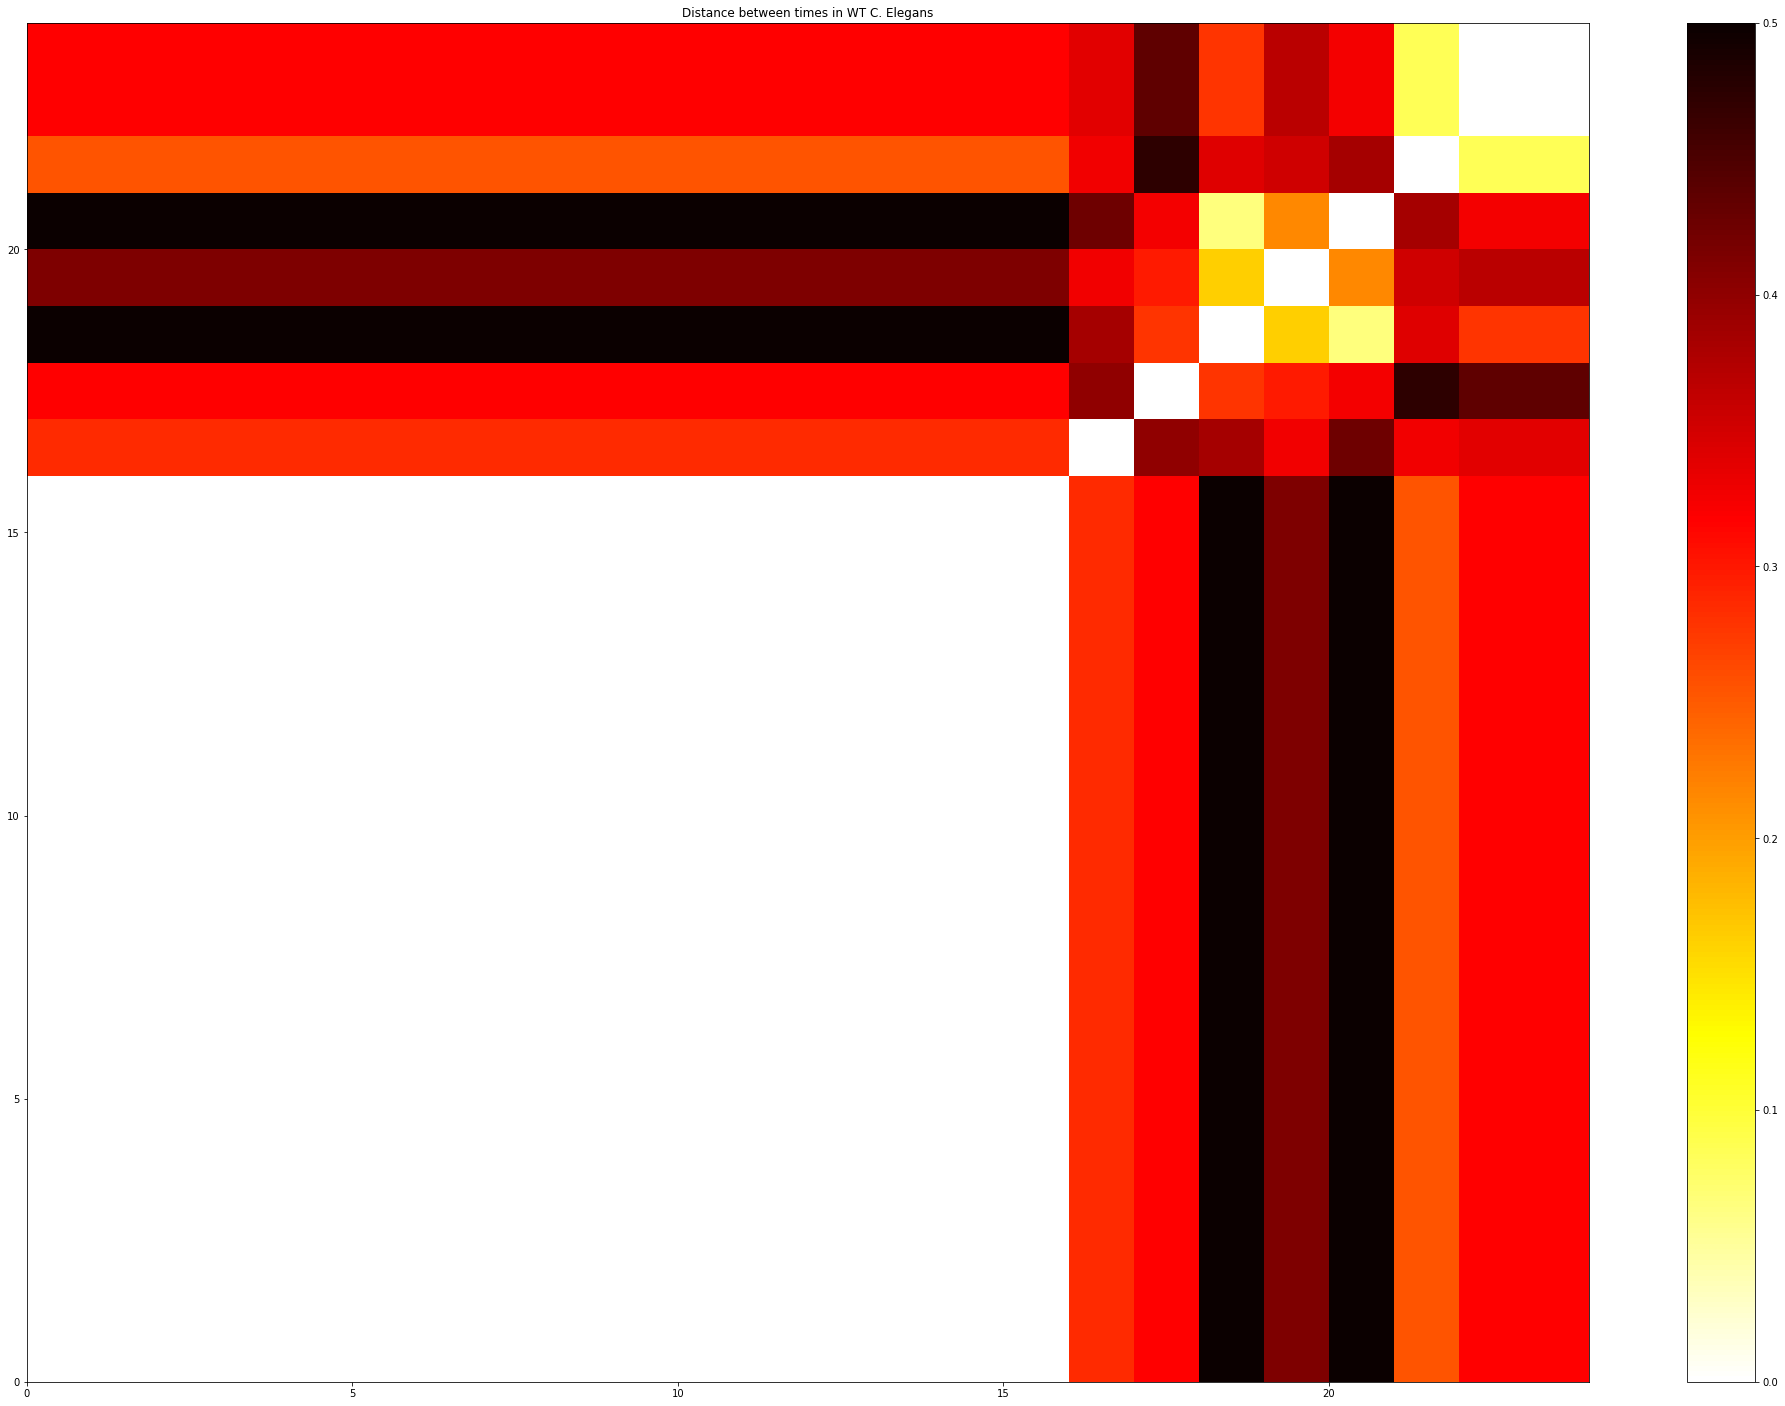

CDC-37 ABar tree 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


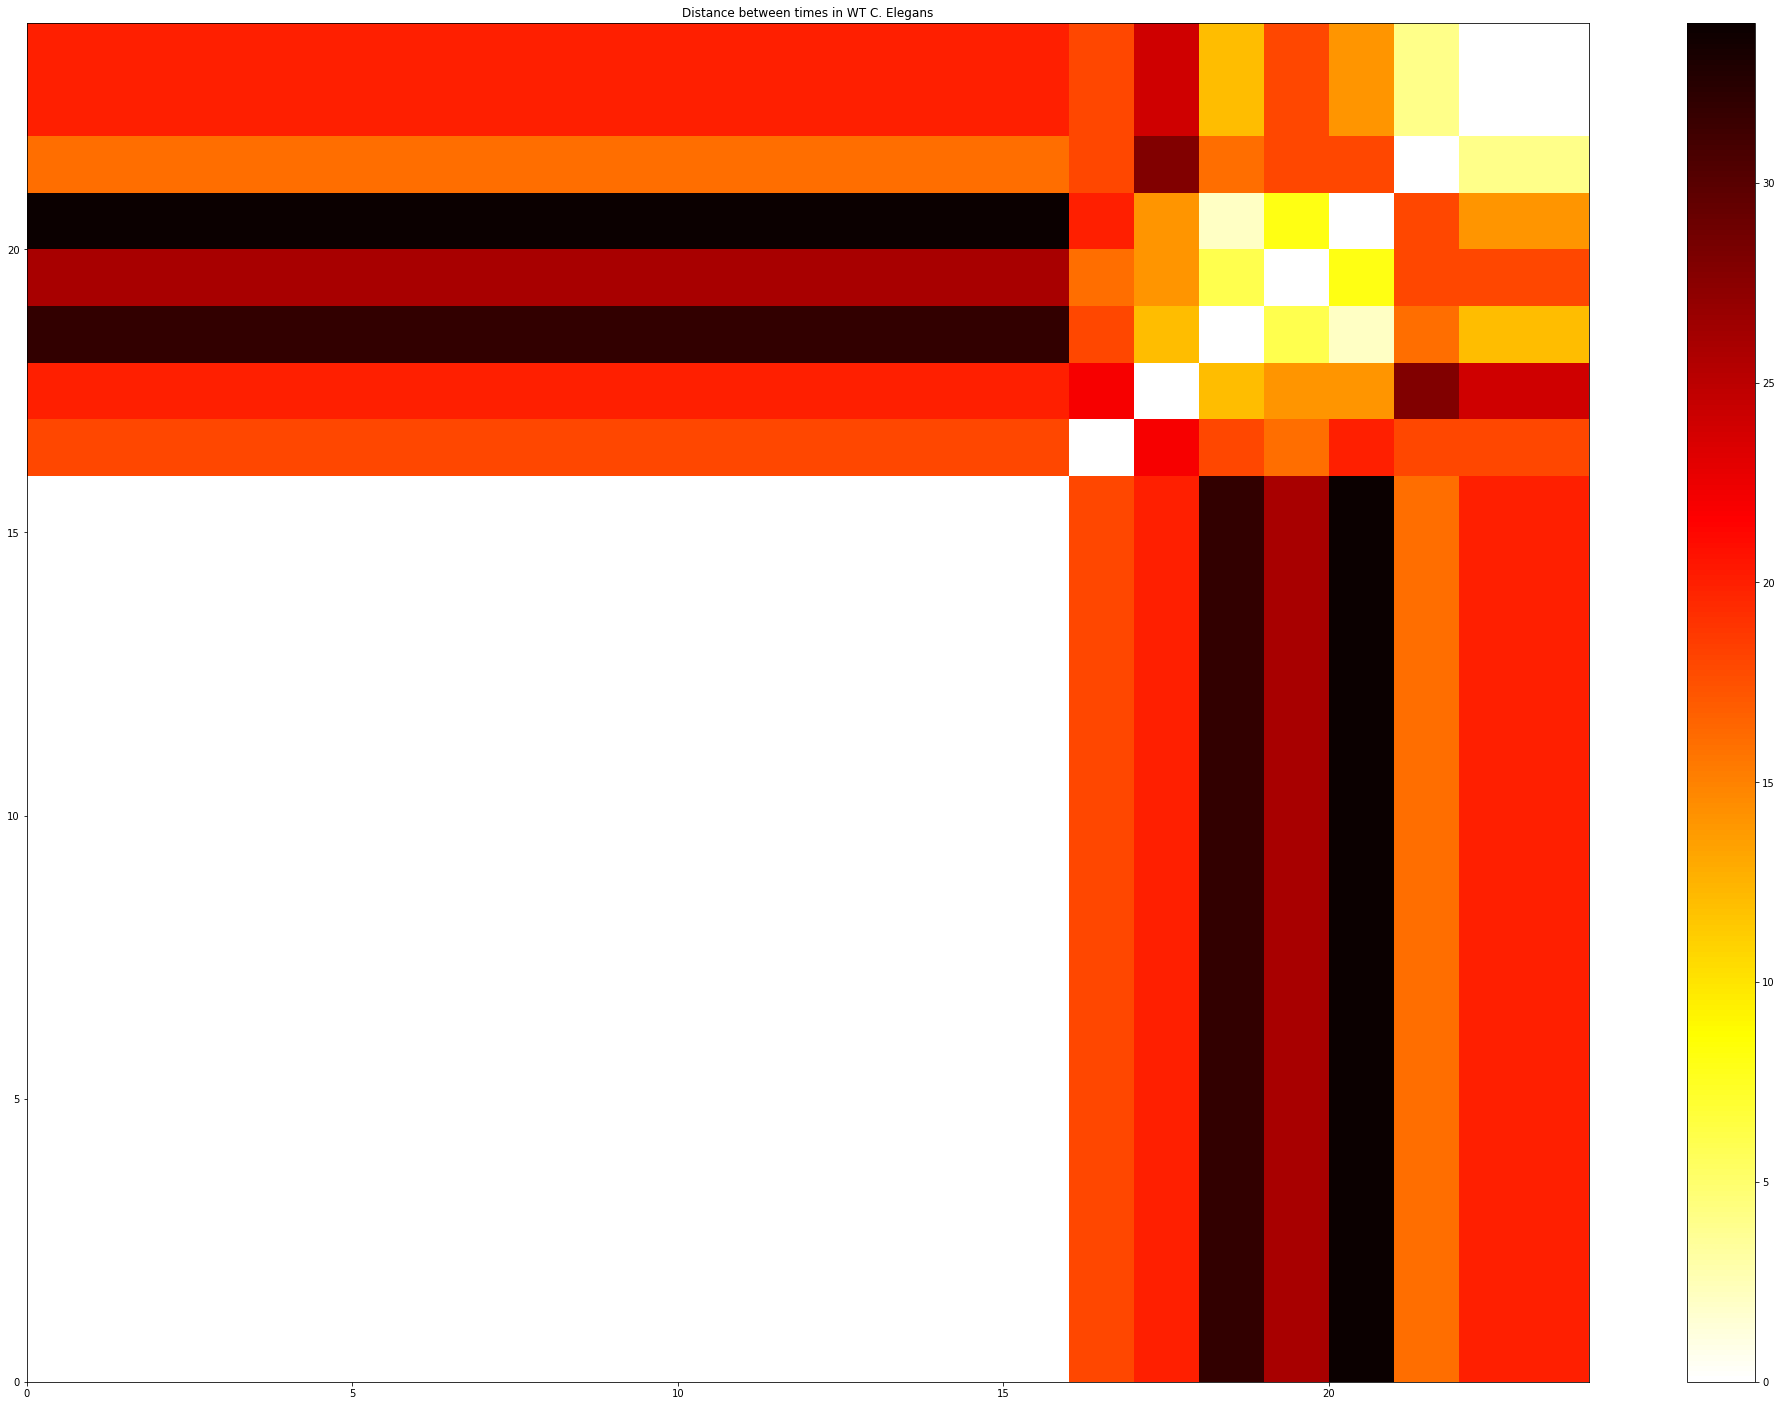

CDC-37 ABar branch 
 [8, 16]
Inlier Self Comparisions: ('mu', 13.543037592204582, 'var', 4.3718470618478396)
Outlier Self Comparisions: ('mu', 14.023178638306183, 'var', 13.029032306724602)
RNAi Self Comparisions: ('mu', 65.68347054303464, 'var', 2223.4316974222993)
Inlier/outlier Comparision: ('mu', 22.693392405853483, 'var', 30.795655399665975)
Inlier/RNAi Comparision: ('mu', 75.37251453759896, 'var', 2820.0554808508637)
Outlier/RNAi Comparision: ('mu', 92.00454831381867, 'var', 4105.091660998772)


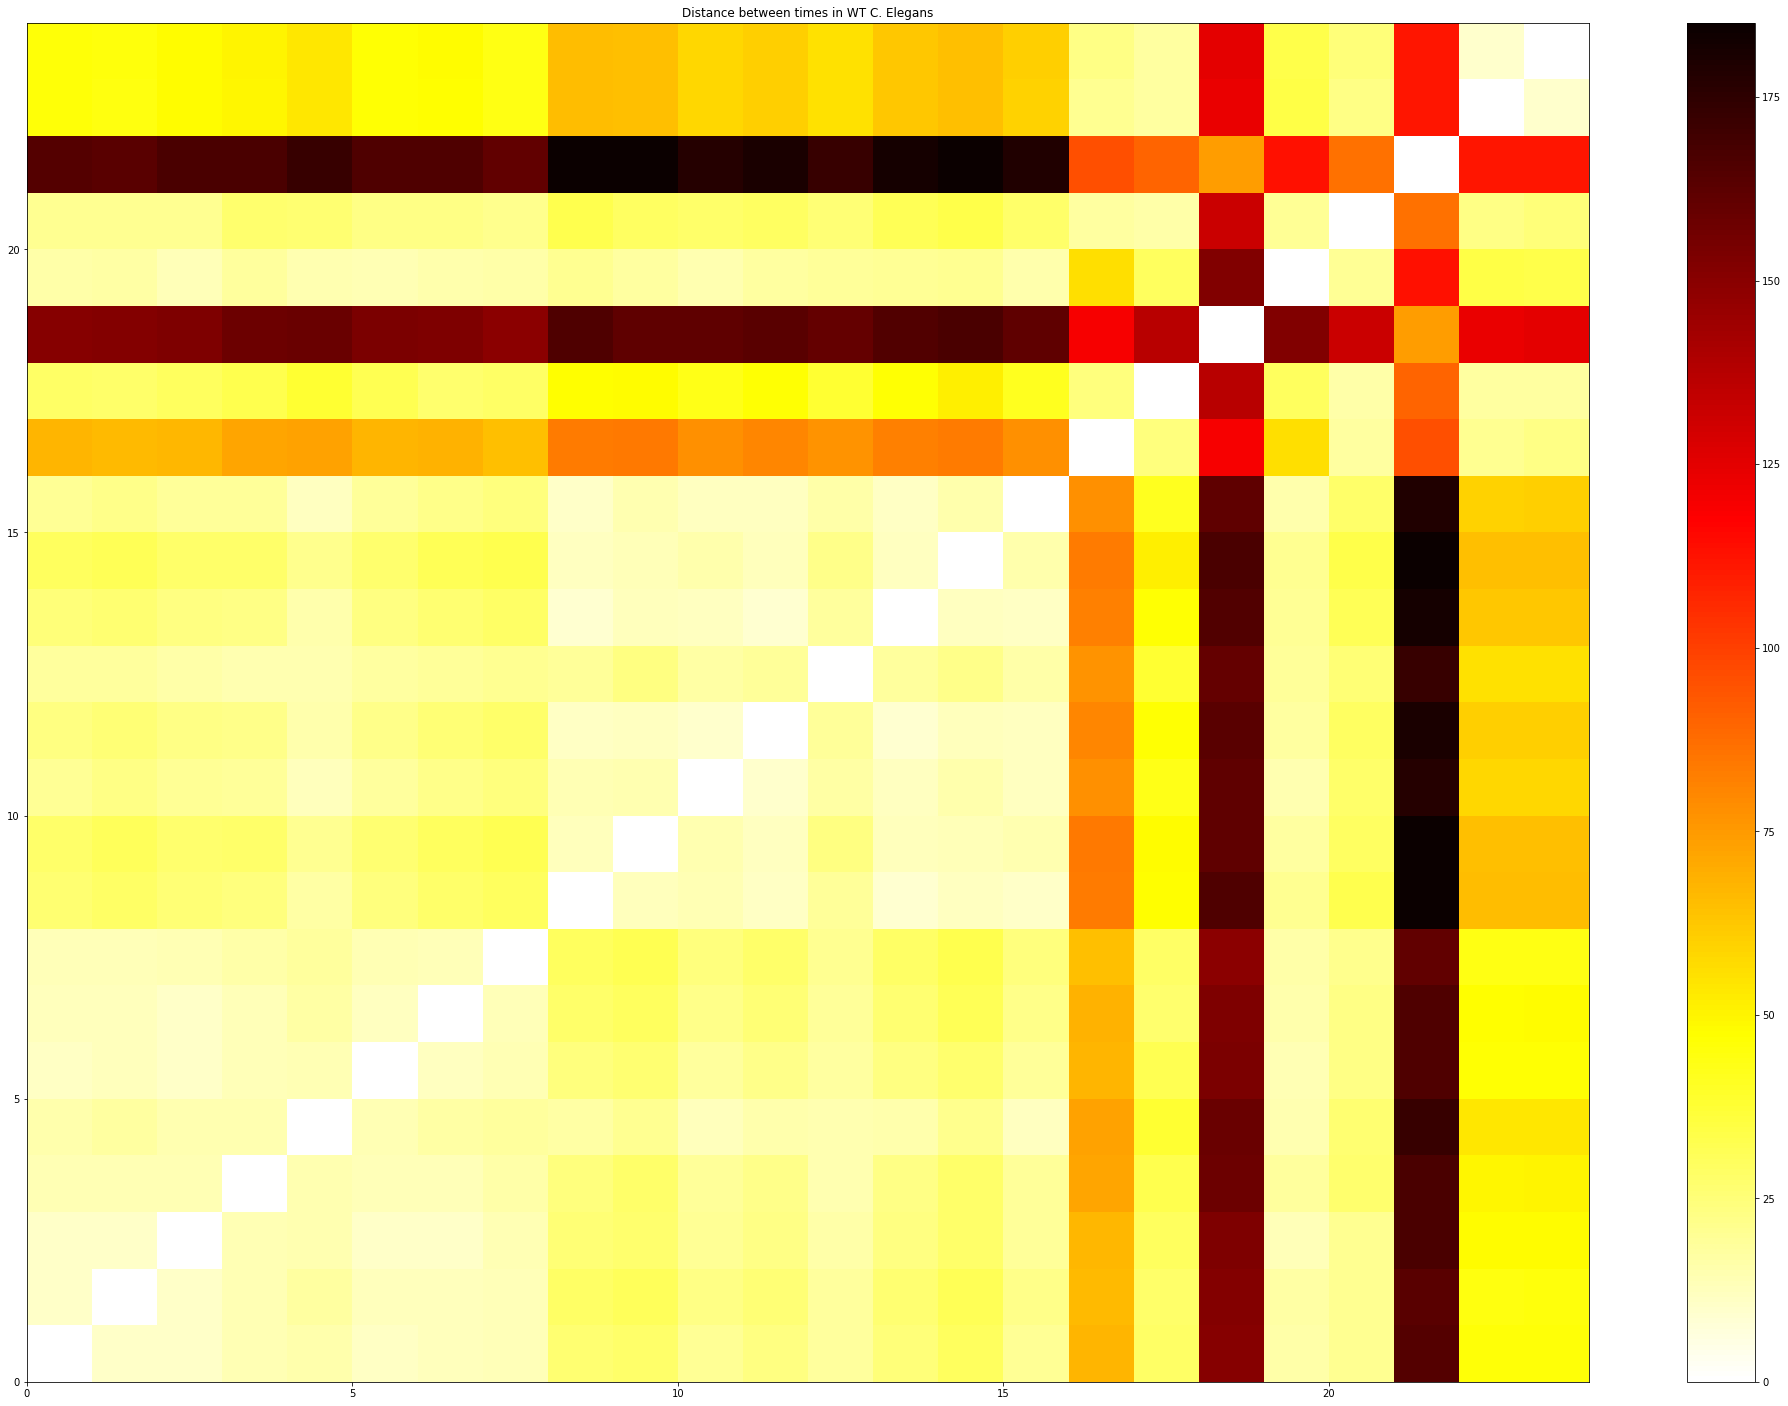

CDC-37 ABarp jaccard 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


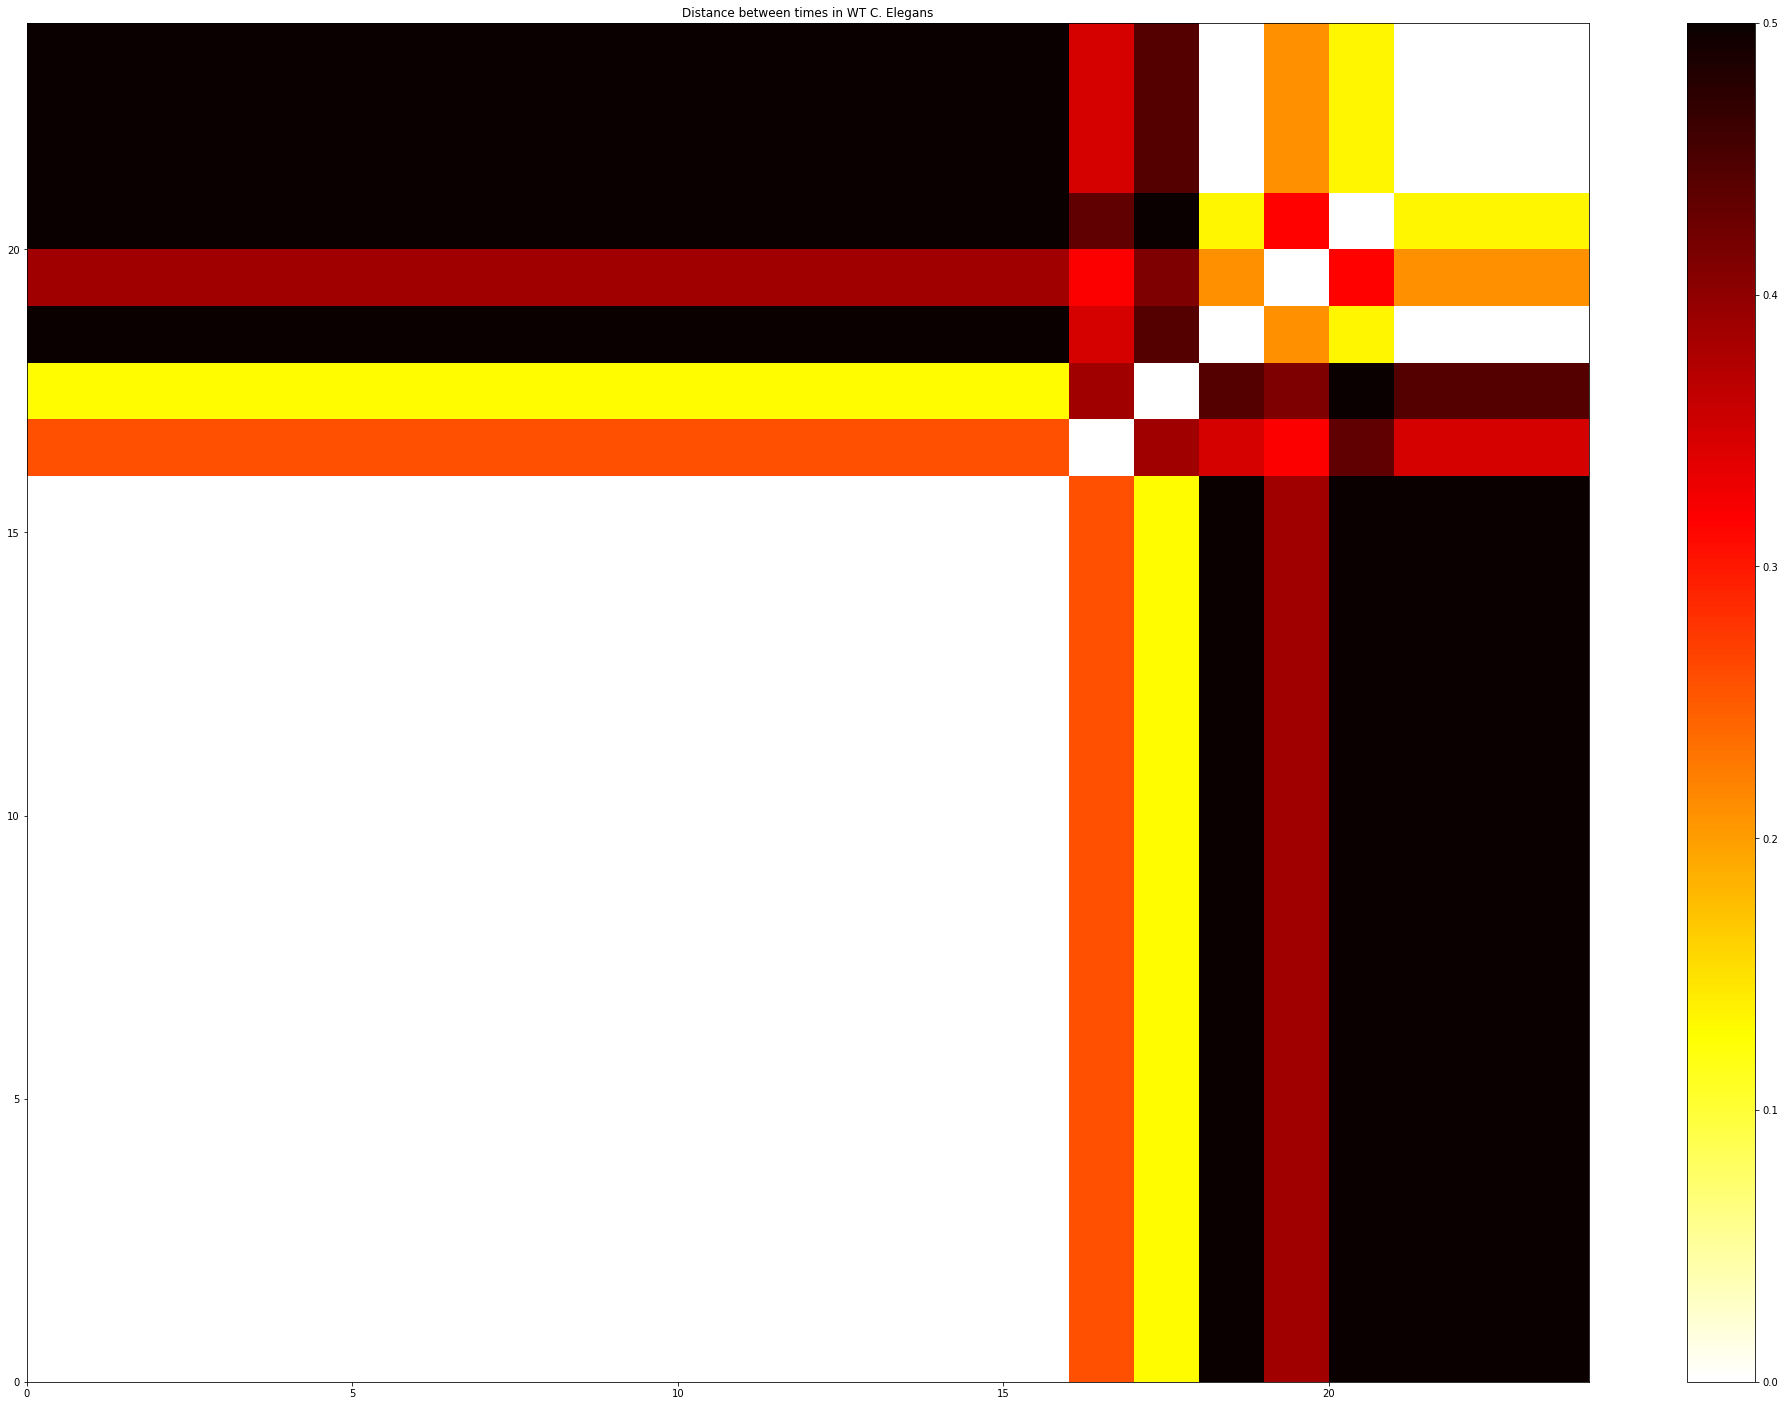

CDC-37 ABarp tree 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


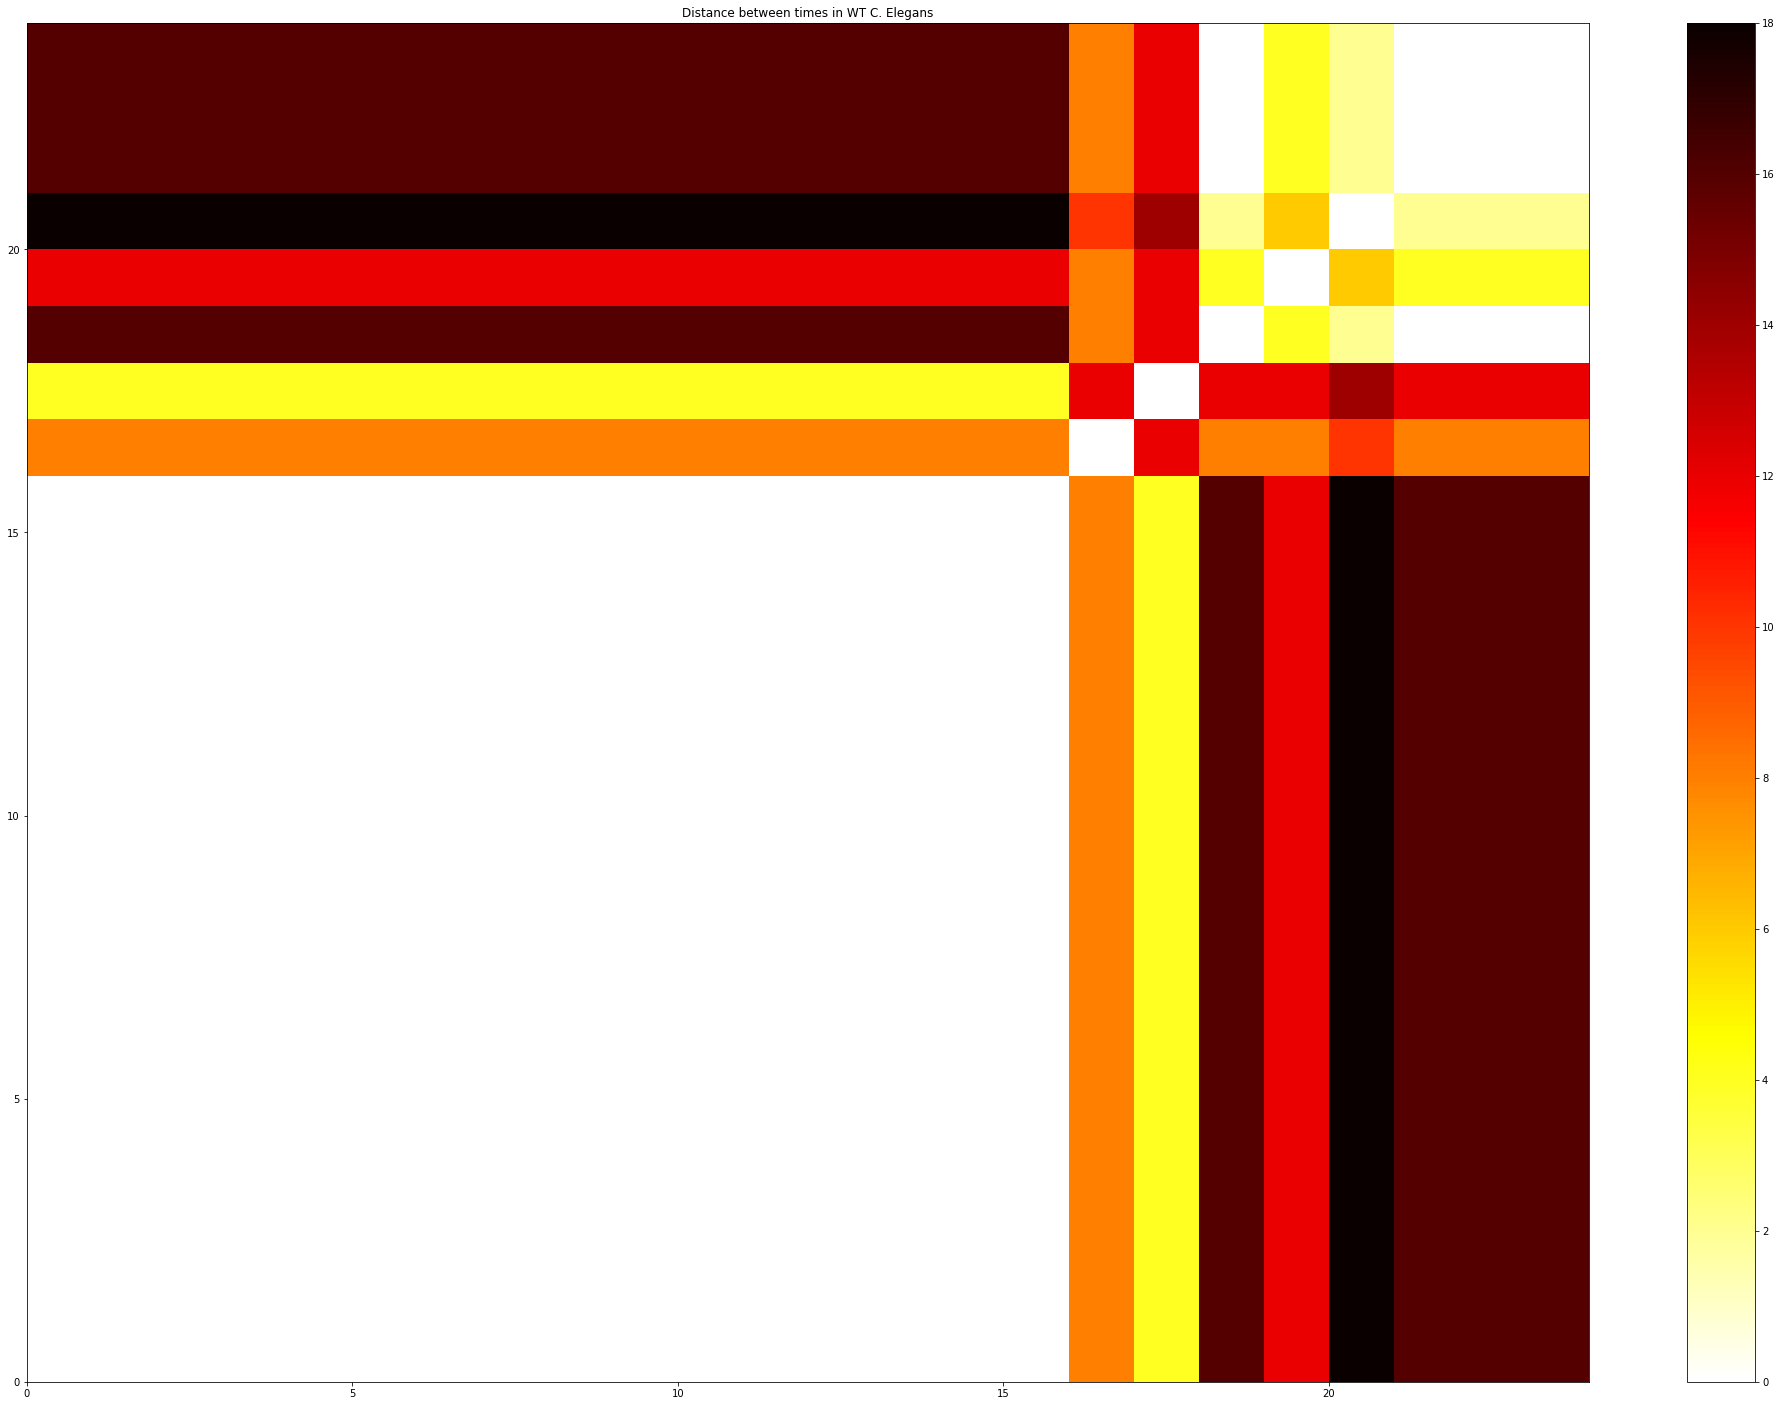

CDC-37 ABarp branch 
 [8, 16]
Inlier Self Comparisions: ('mu', 9.983095061319437, 'var', 4.230670139516592)
Outlier Self Comparisions: ('mu', 10.79647531055204, 'var', 9.078978011497366)
RNAi Self Comparisions: ('mu', 45.291595112474454, 'var', 915.3856978819653)
Inlier/outlier Comparision: ('mu', 16.94598263912643, 'var', 10.262243822997146)
Inlier/RNAi Comparision: ('mu', 44.74128790061237, 'var', 1132.360014137374)
Outlier/RNAi Comparision: ('mu', 44.13736618835283, 'var', 784.3214773838198)


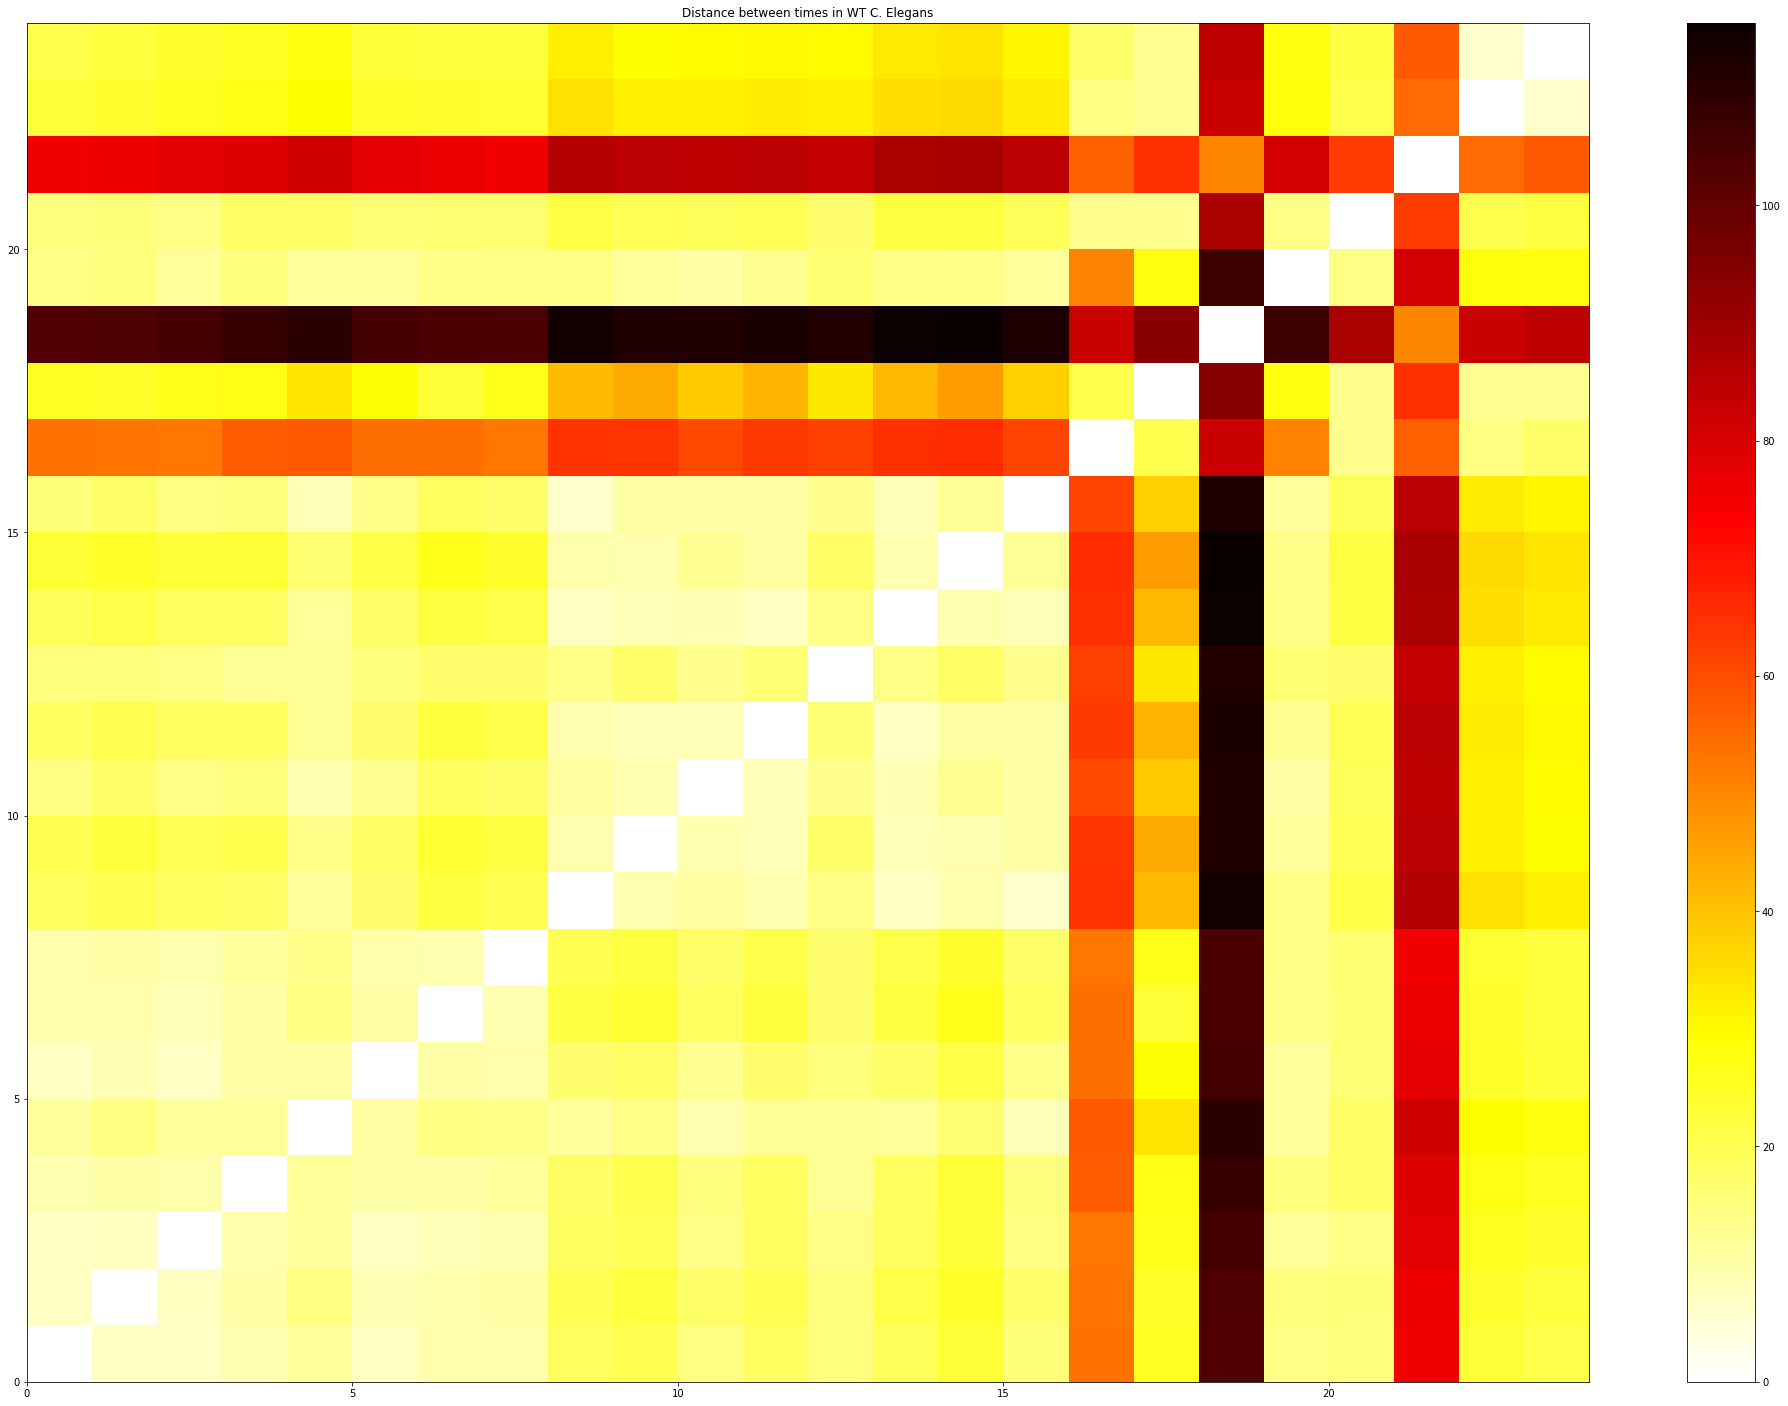

CDC-37 ABp jaccard 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


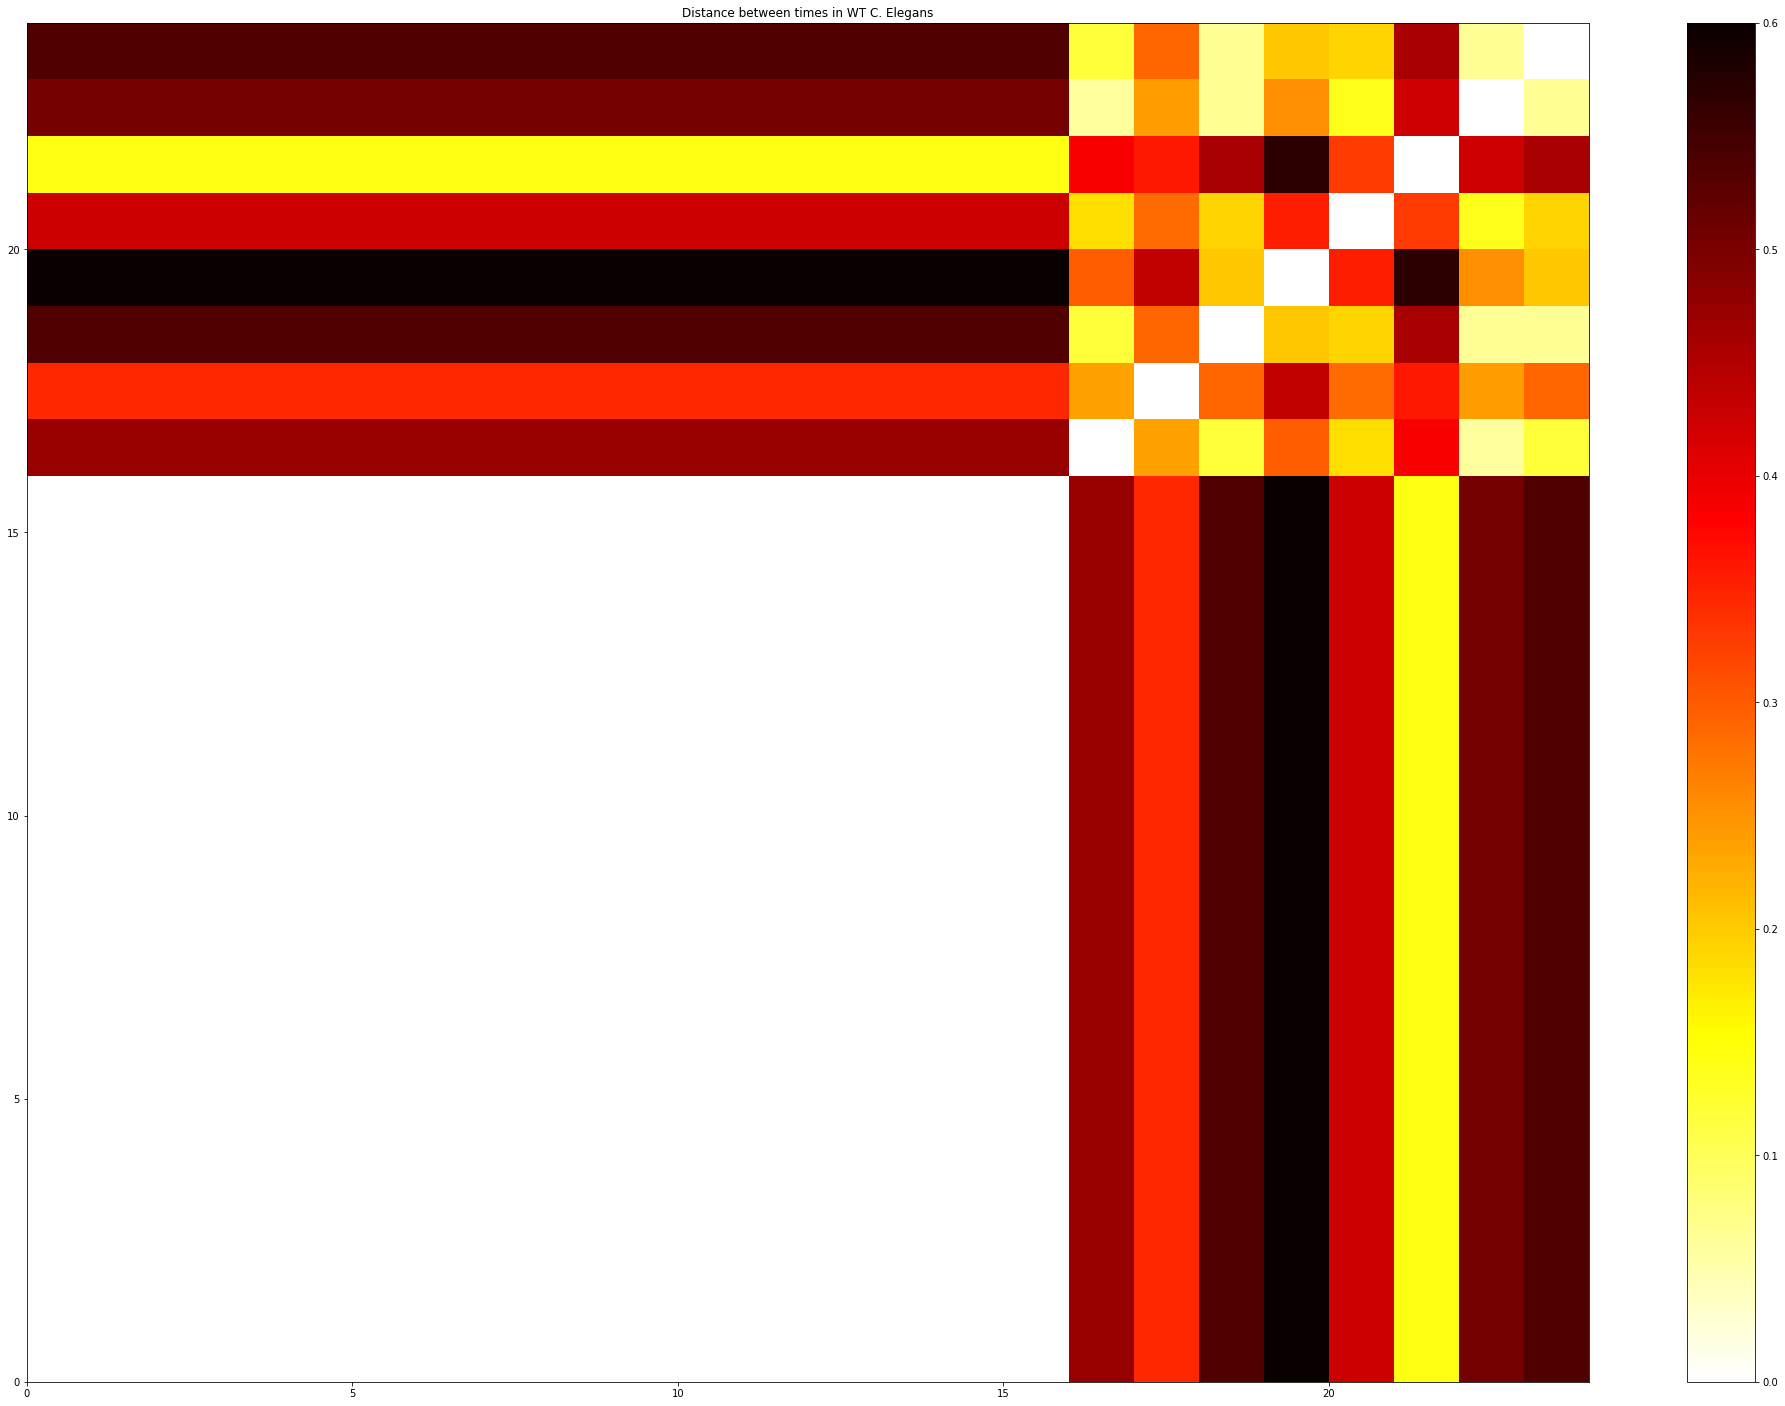

CDC-37 ABp tree 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


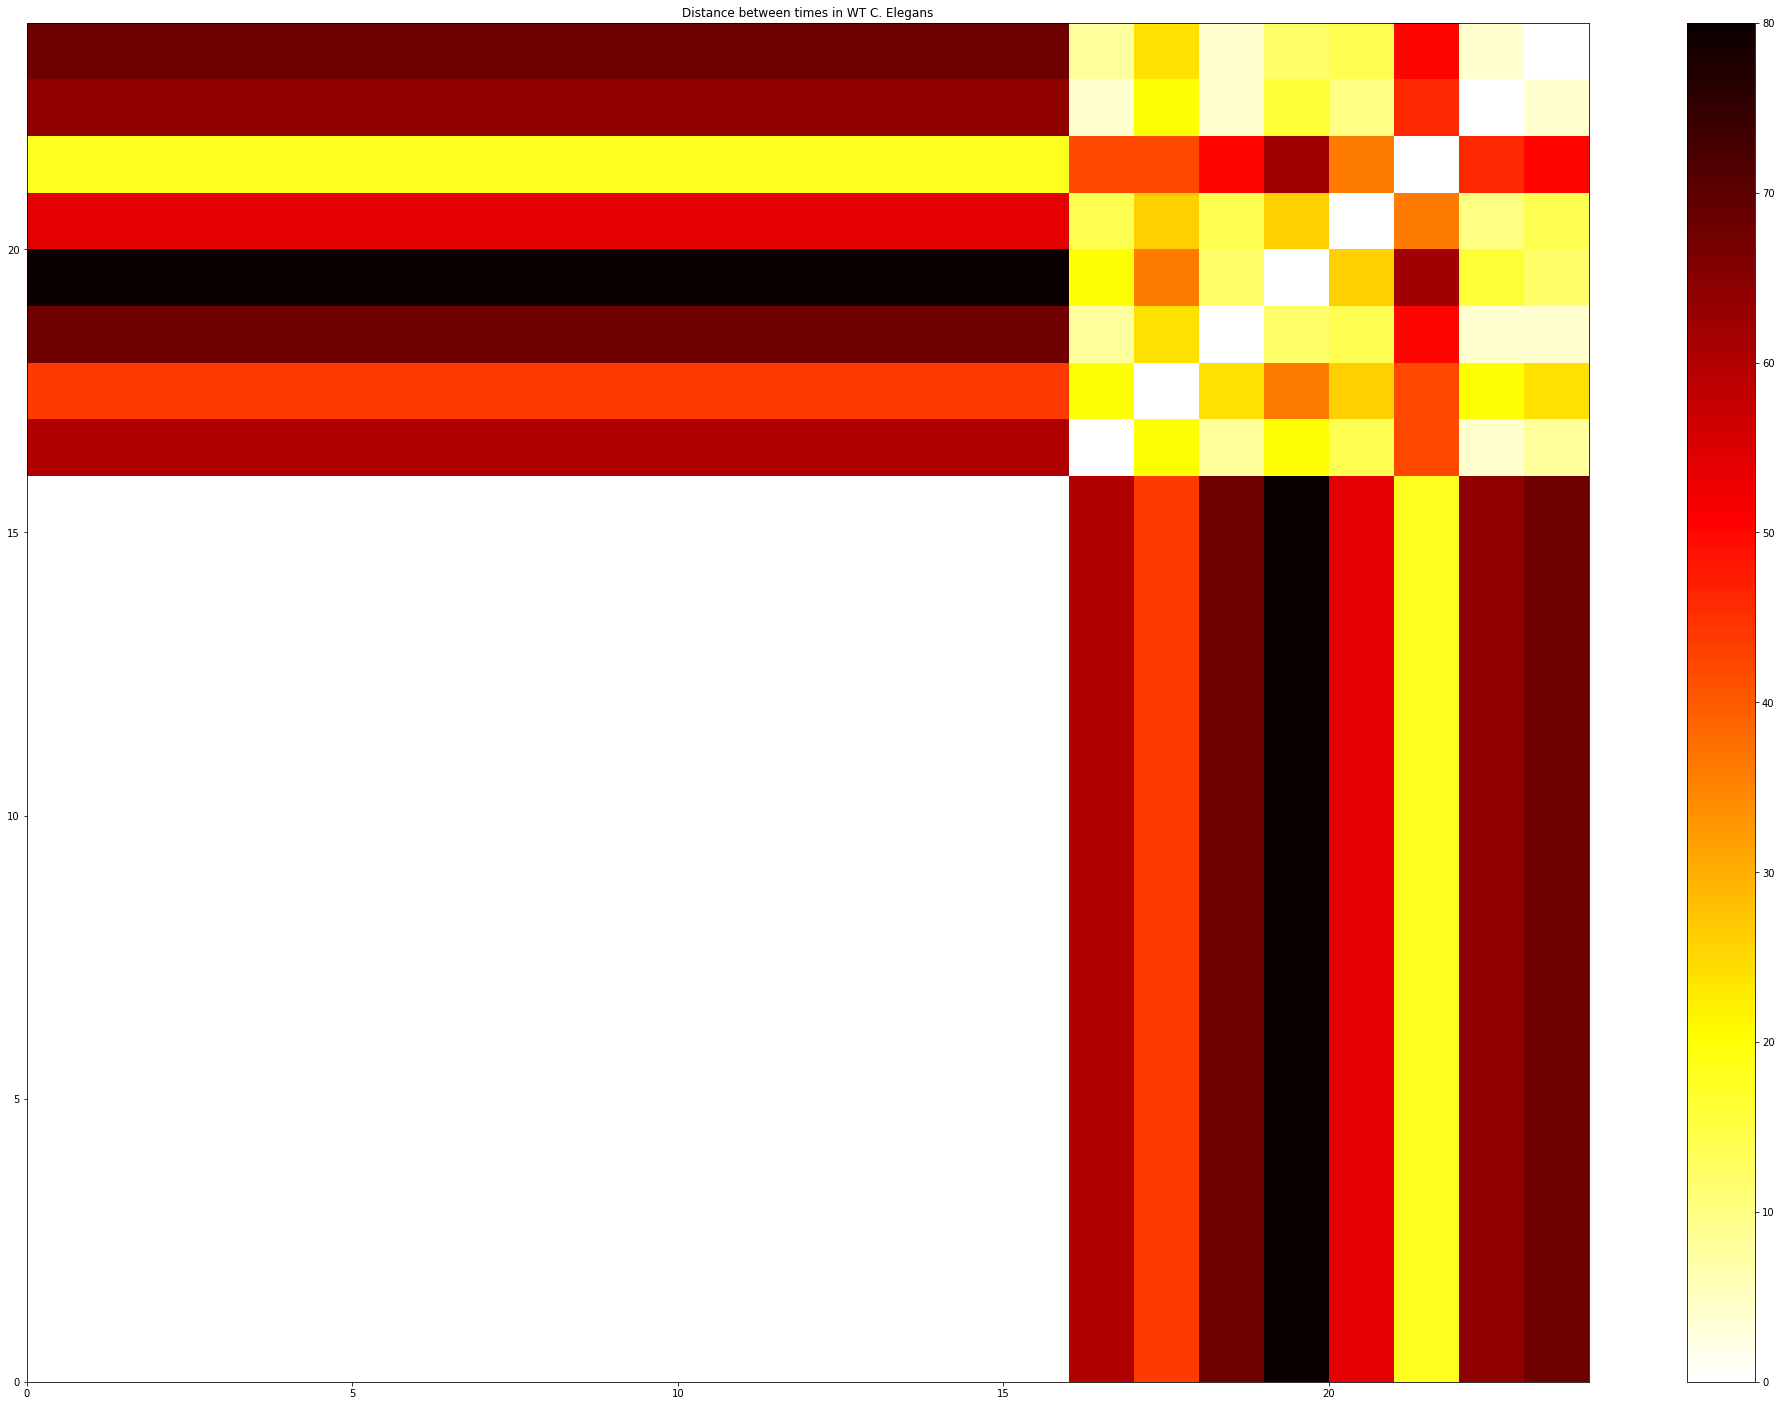

CDC-37 ABp branch 
 [8, 16]
Inlier Self Comparisions: ('mu', 22.821360848752114, 'var', 9.971203296758391)
Outlier Self Comparisions: ('mu', 19.65348160299174, 'var', 10.990660880865207)
RNAi Self Comparisions: ('mu', 80.38579260482632, 'var', 4042.802918722419)
Inlier/outlier Comparision: ('mu', 32.88334015104406, 'var', 30.543083367877014)
Inlier/RNAi Comparision: ('mu', 78.0571324284331, 'var', 5257.512648478628)
Outlier/RNAi Comparision: ('mu', 84.39874376741217, 'var', 4637.209193339849)


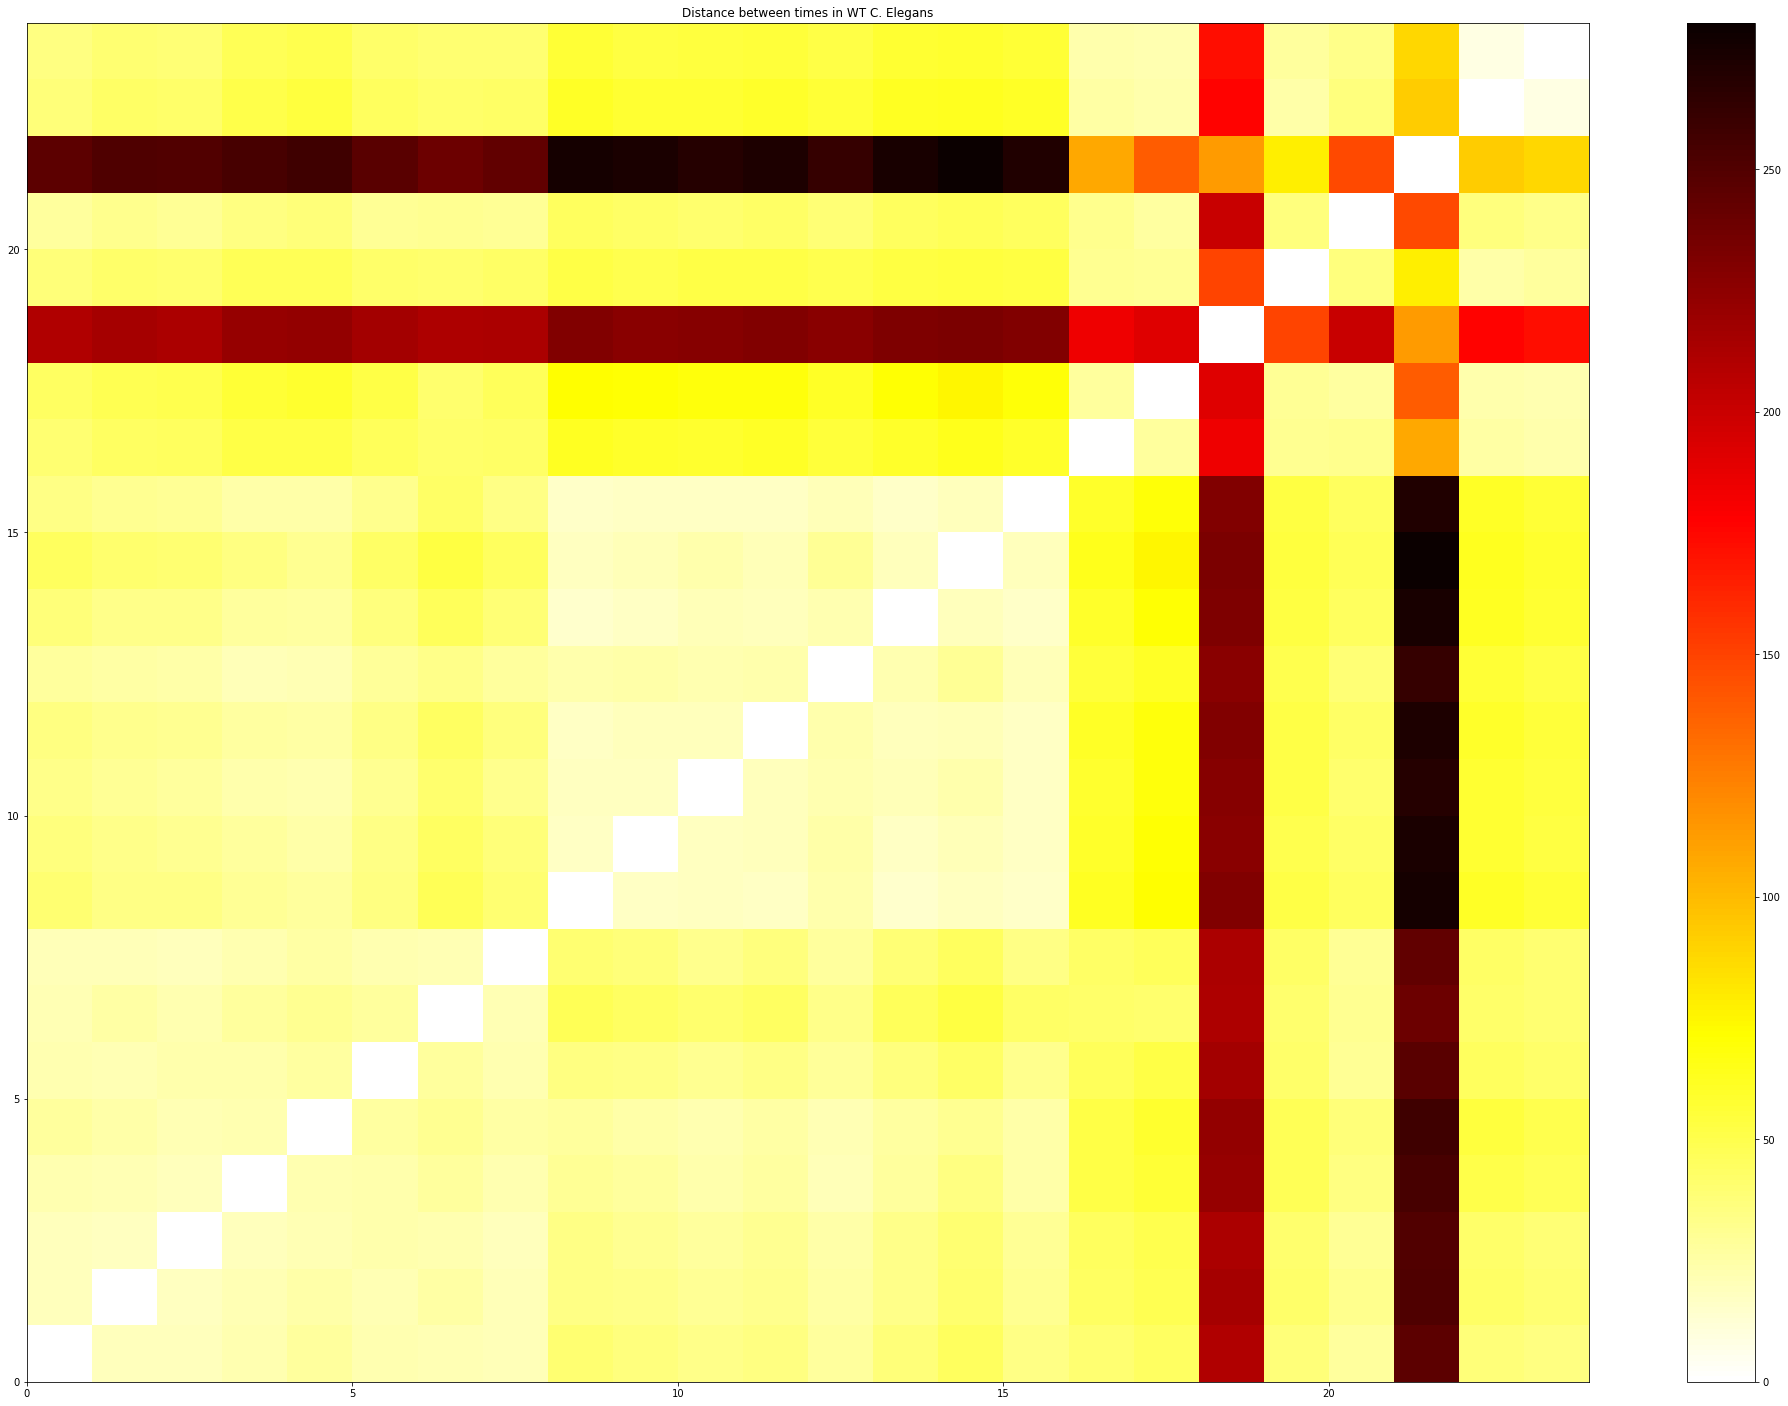

CDC-37 ABplp jaccard 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


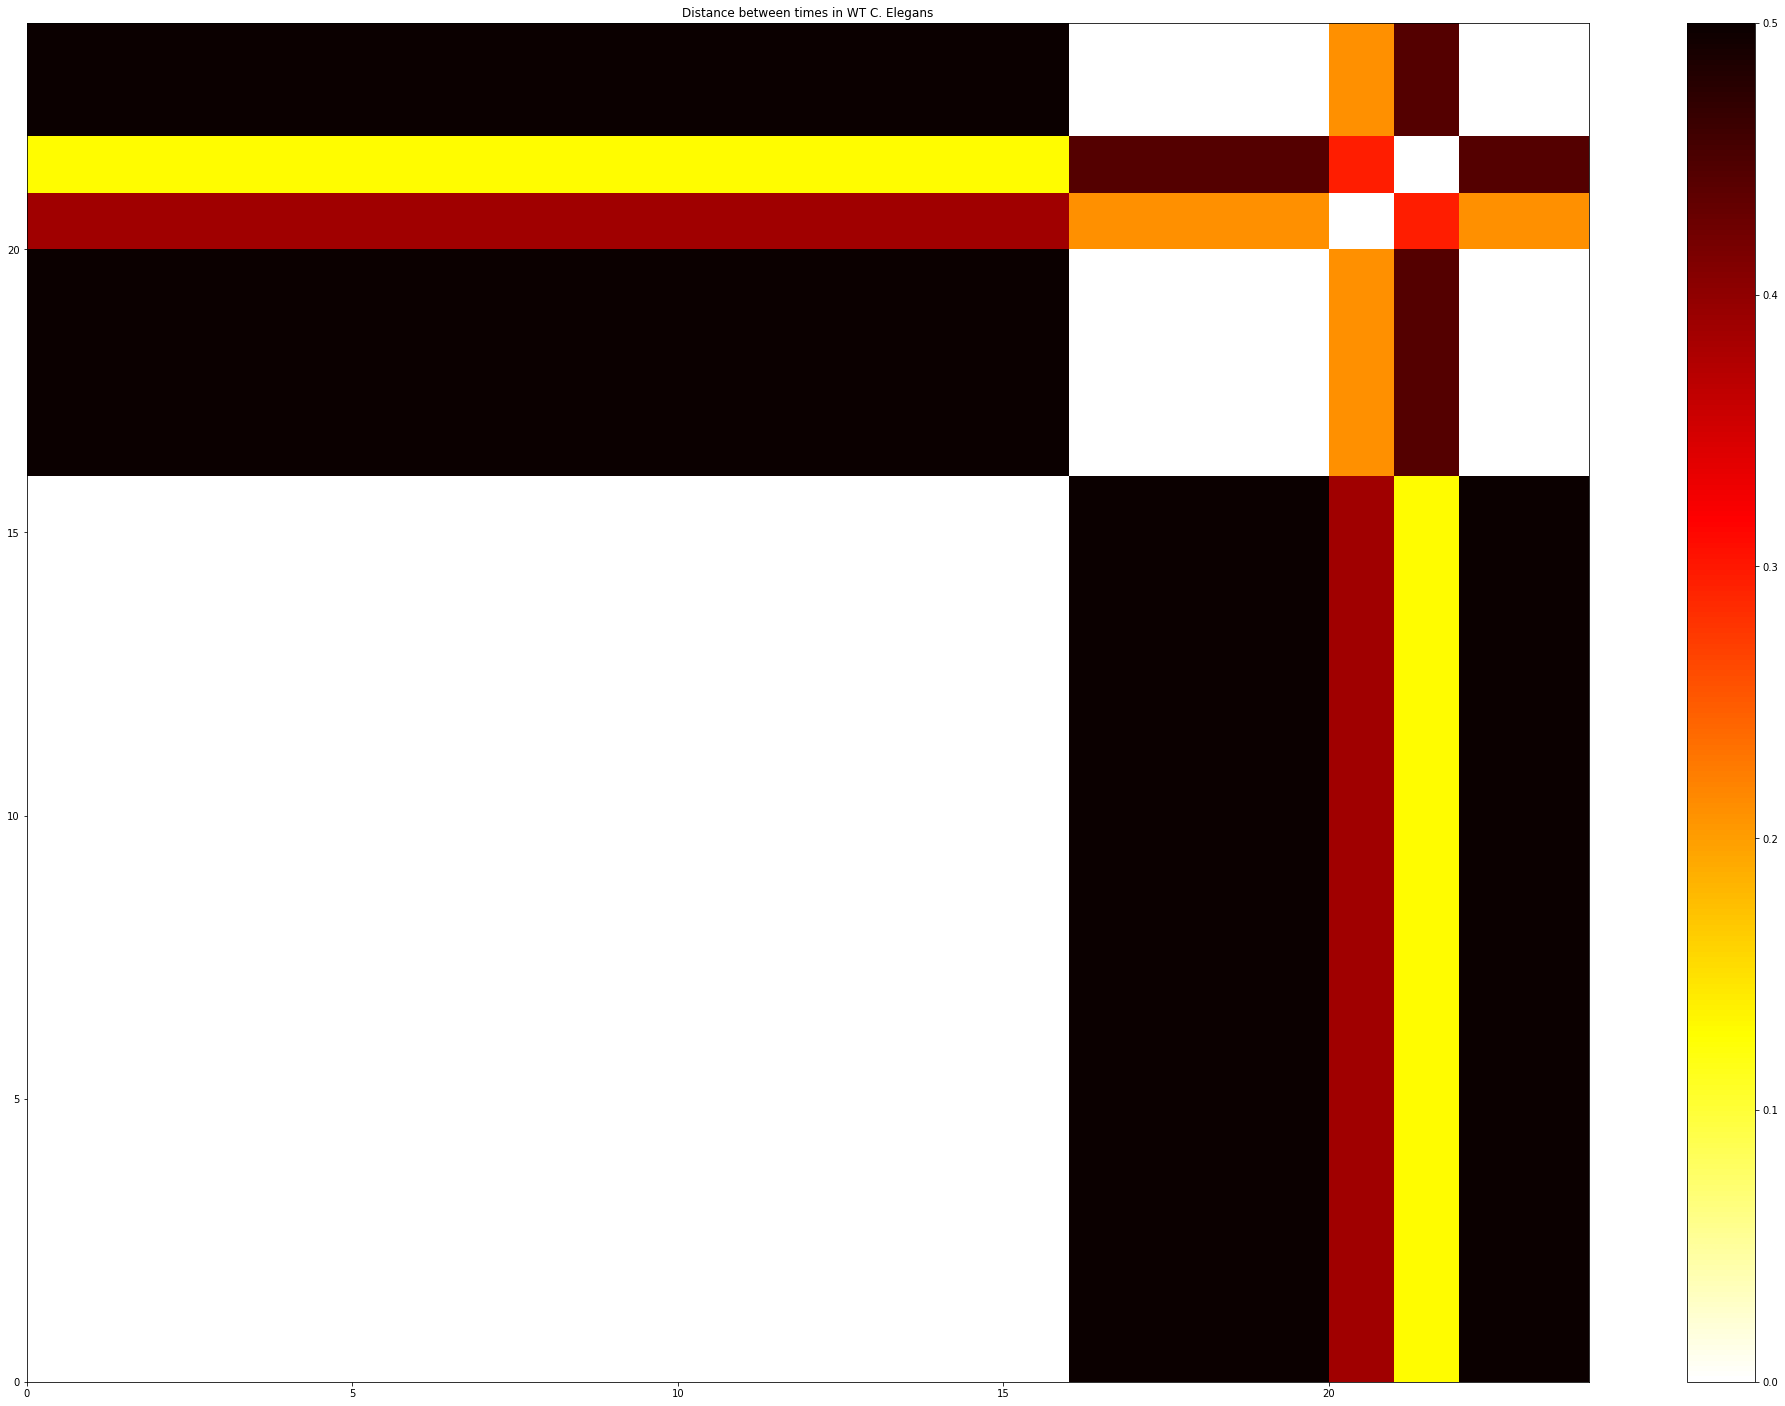

CDC-37 ABplp tree 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


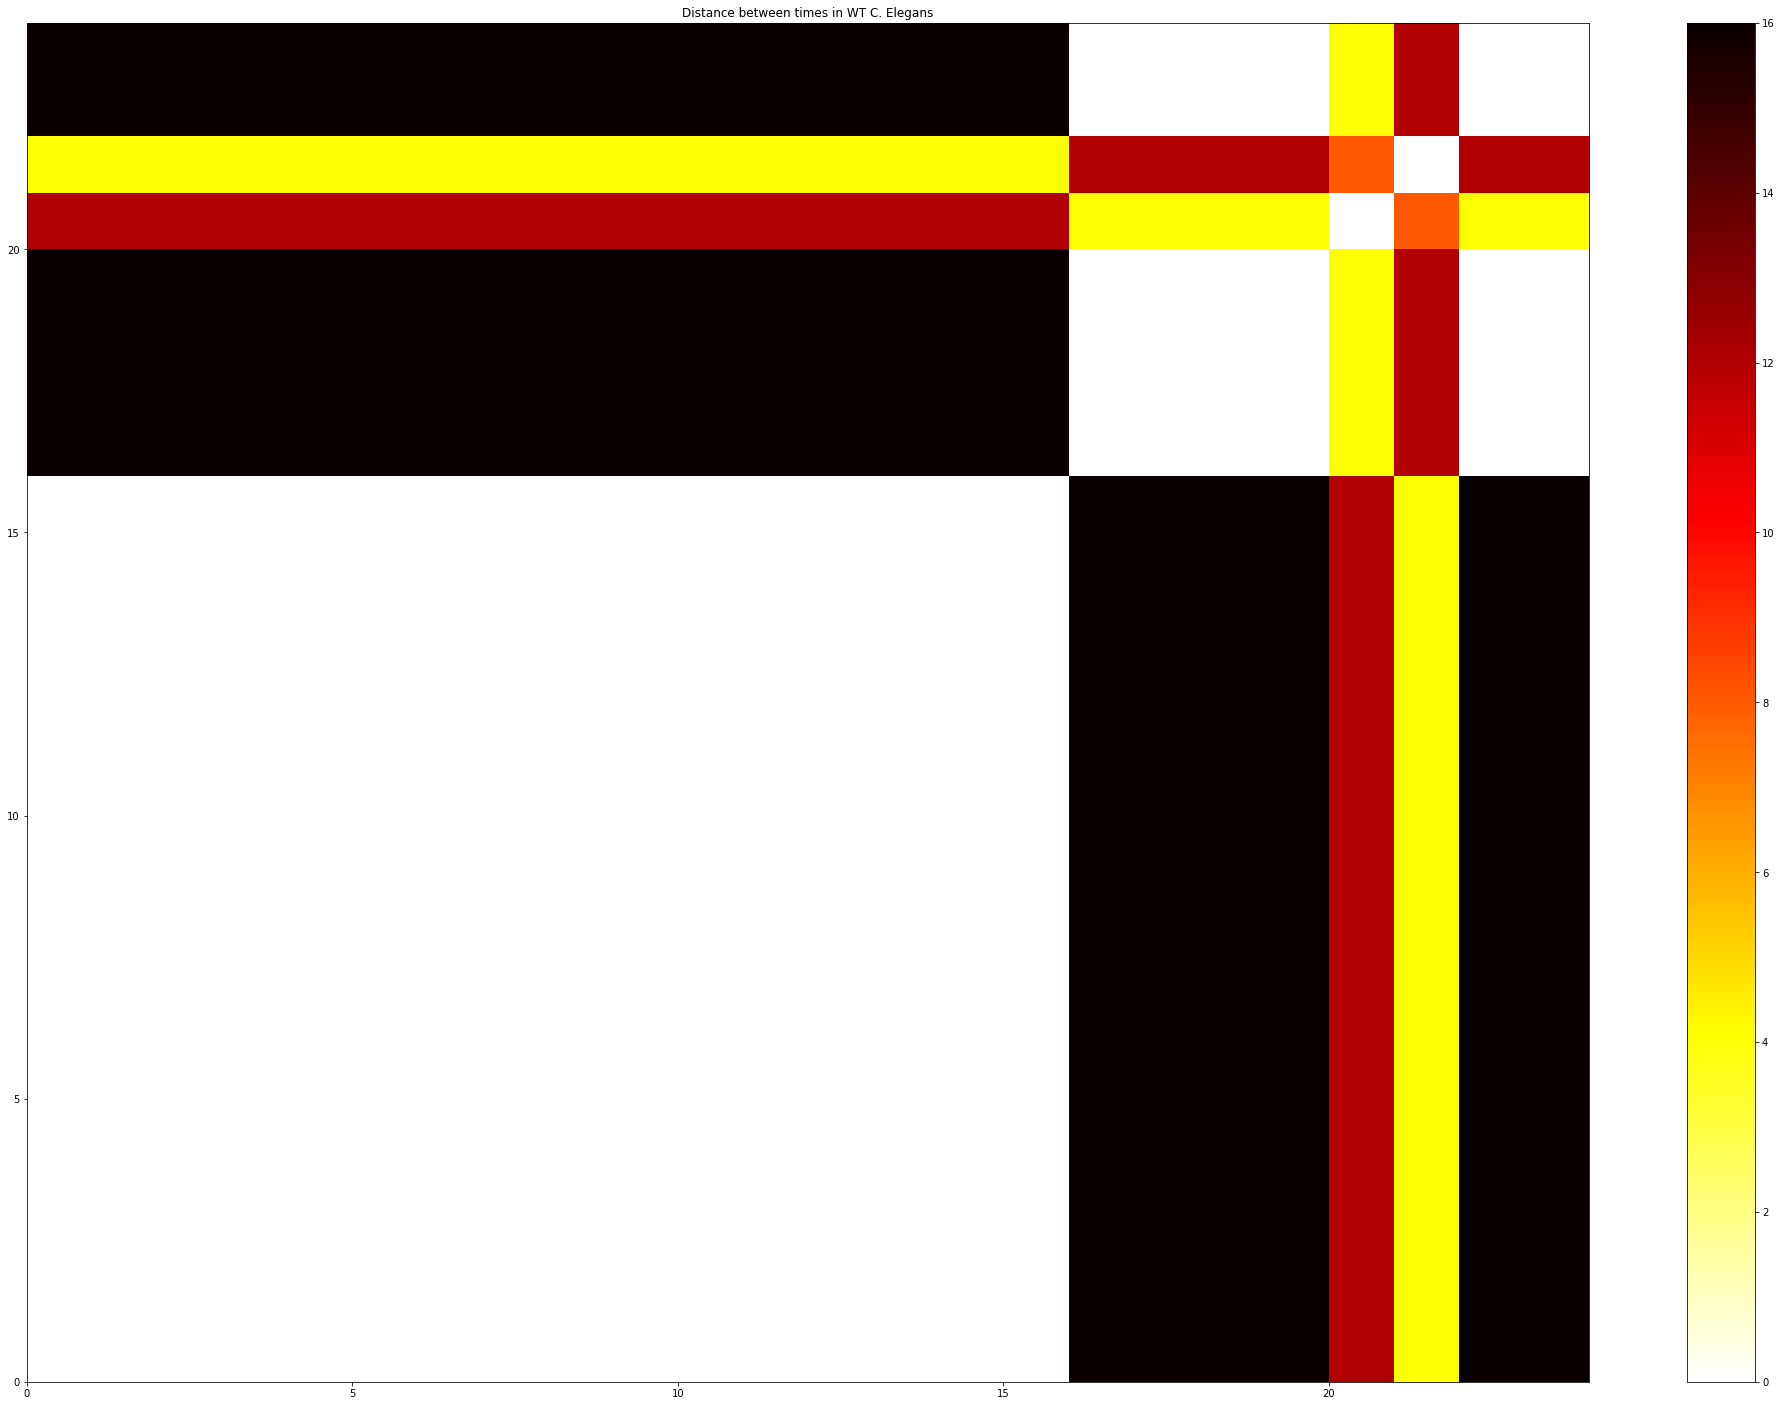

CDC-37 ABplp branch 
 [8, 16]
Inlier Self Comparisions: ('mu', 9.083452731150176, 'var', 5.348029338103275)
Outlier Self Comparisions: ('mu', 7.8120585986409, 'var', 4.0788833085436496)
RNAi Self Comparisions: ('mu', 41.64177639741863, 'var', 1254.2481727531035)
Inlier/outlier Comparision: ('mu', 13.994752389595945, 'var', 9.682619839612968)
Inlier/RNAi Comparision: ('mu', 42.95355027597763, 'var', 1777.5996615462052)
Outlier/RNAi Comparision: ('mu', 55.15327557389007, 'var', 2082.7233363276832)


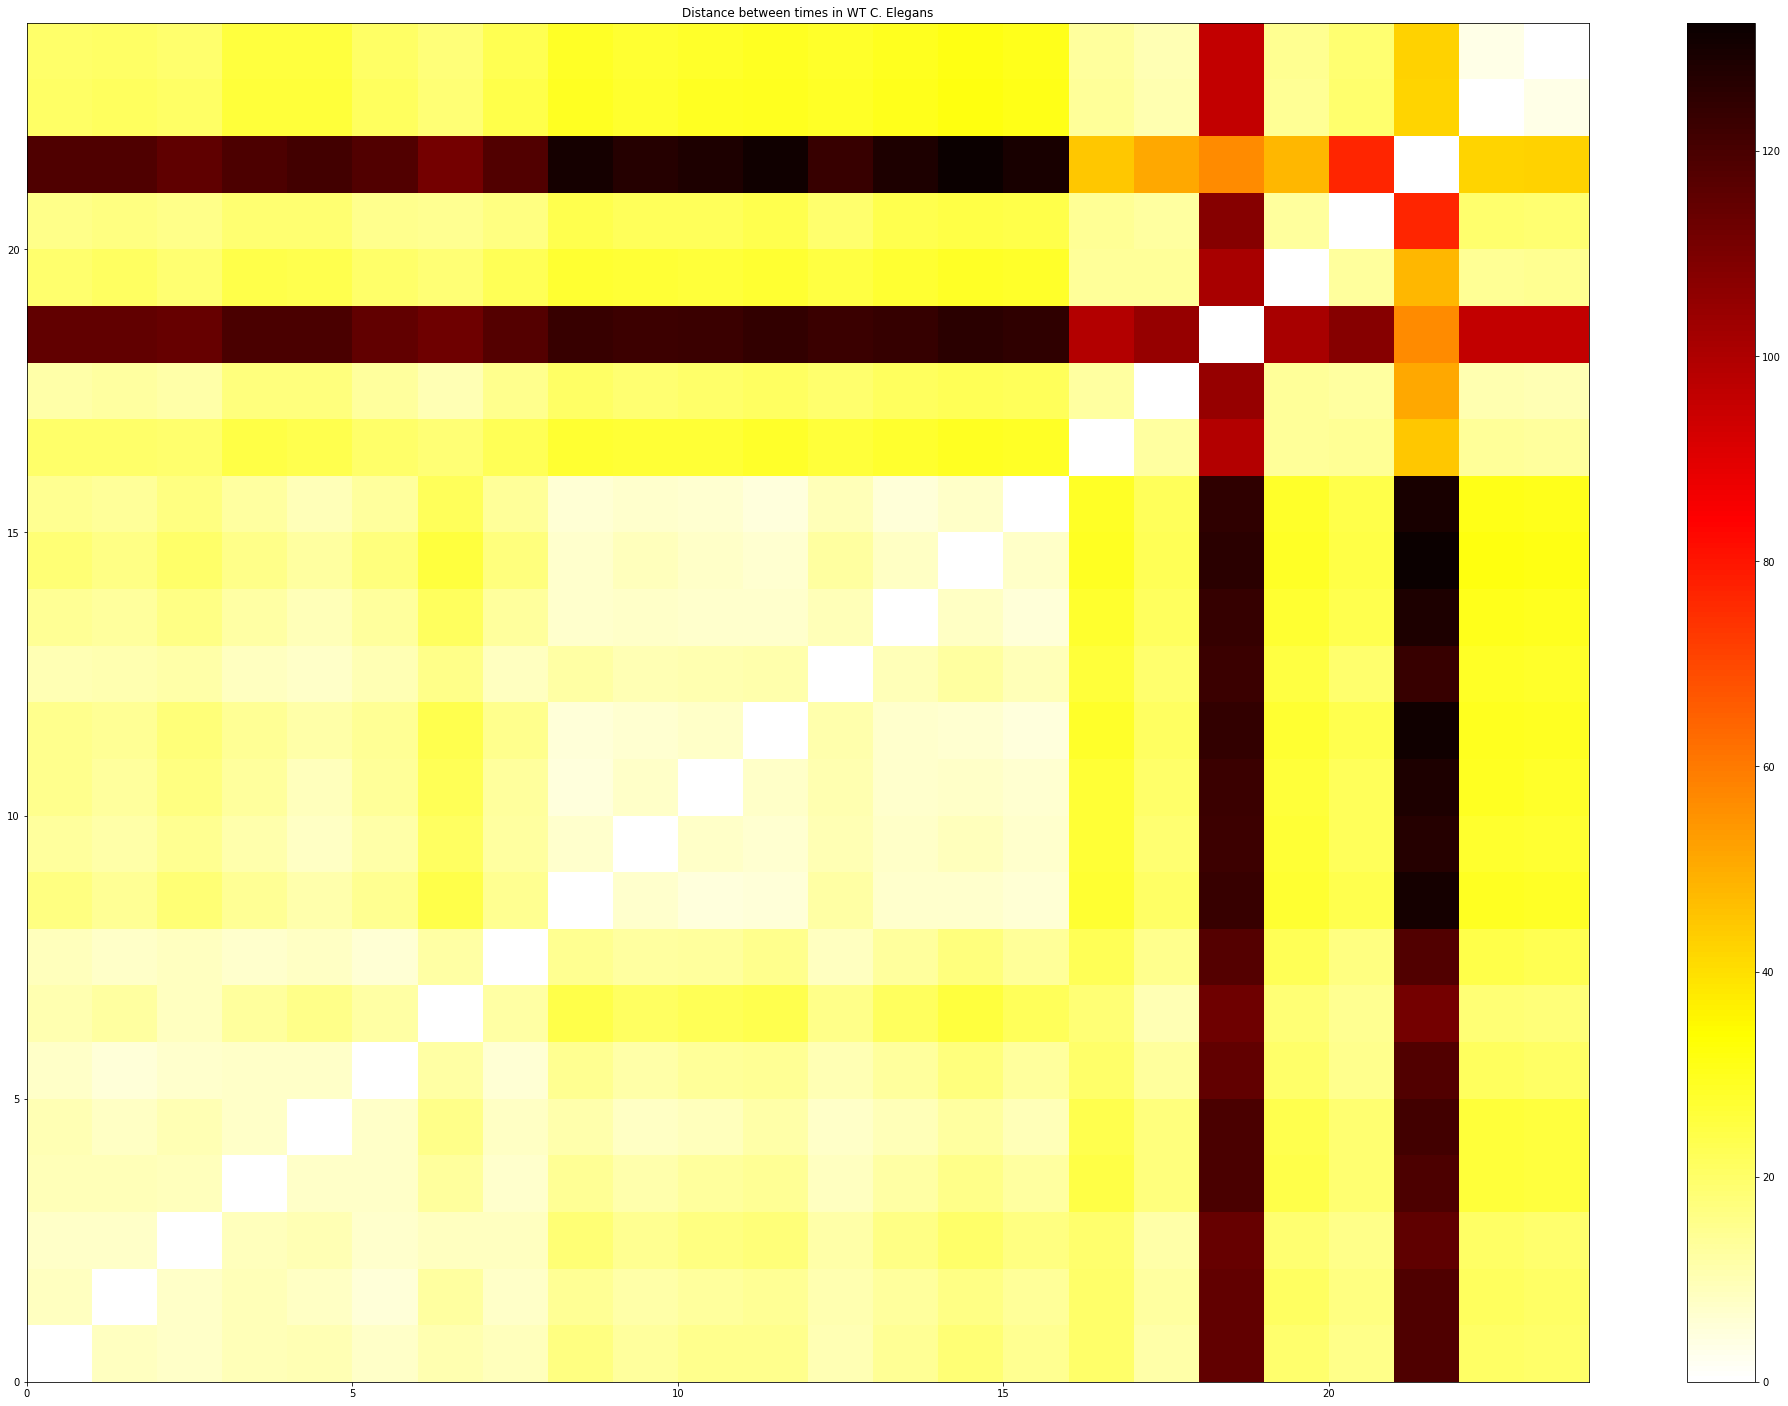

CDC-37 C jaccard 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


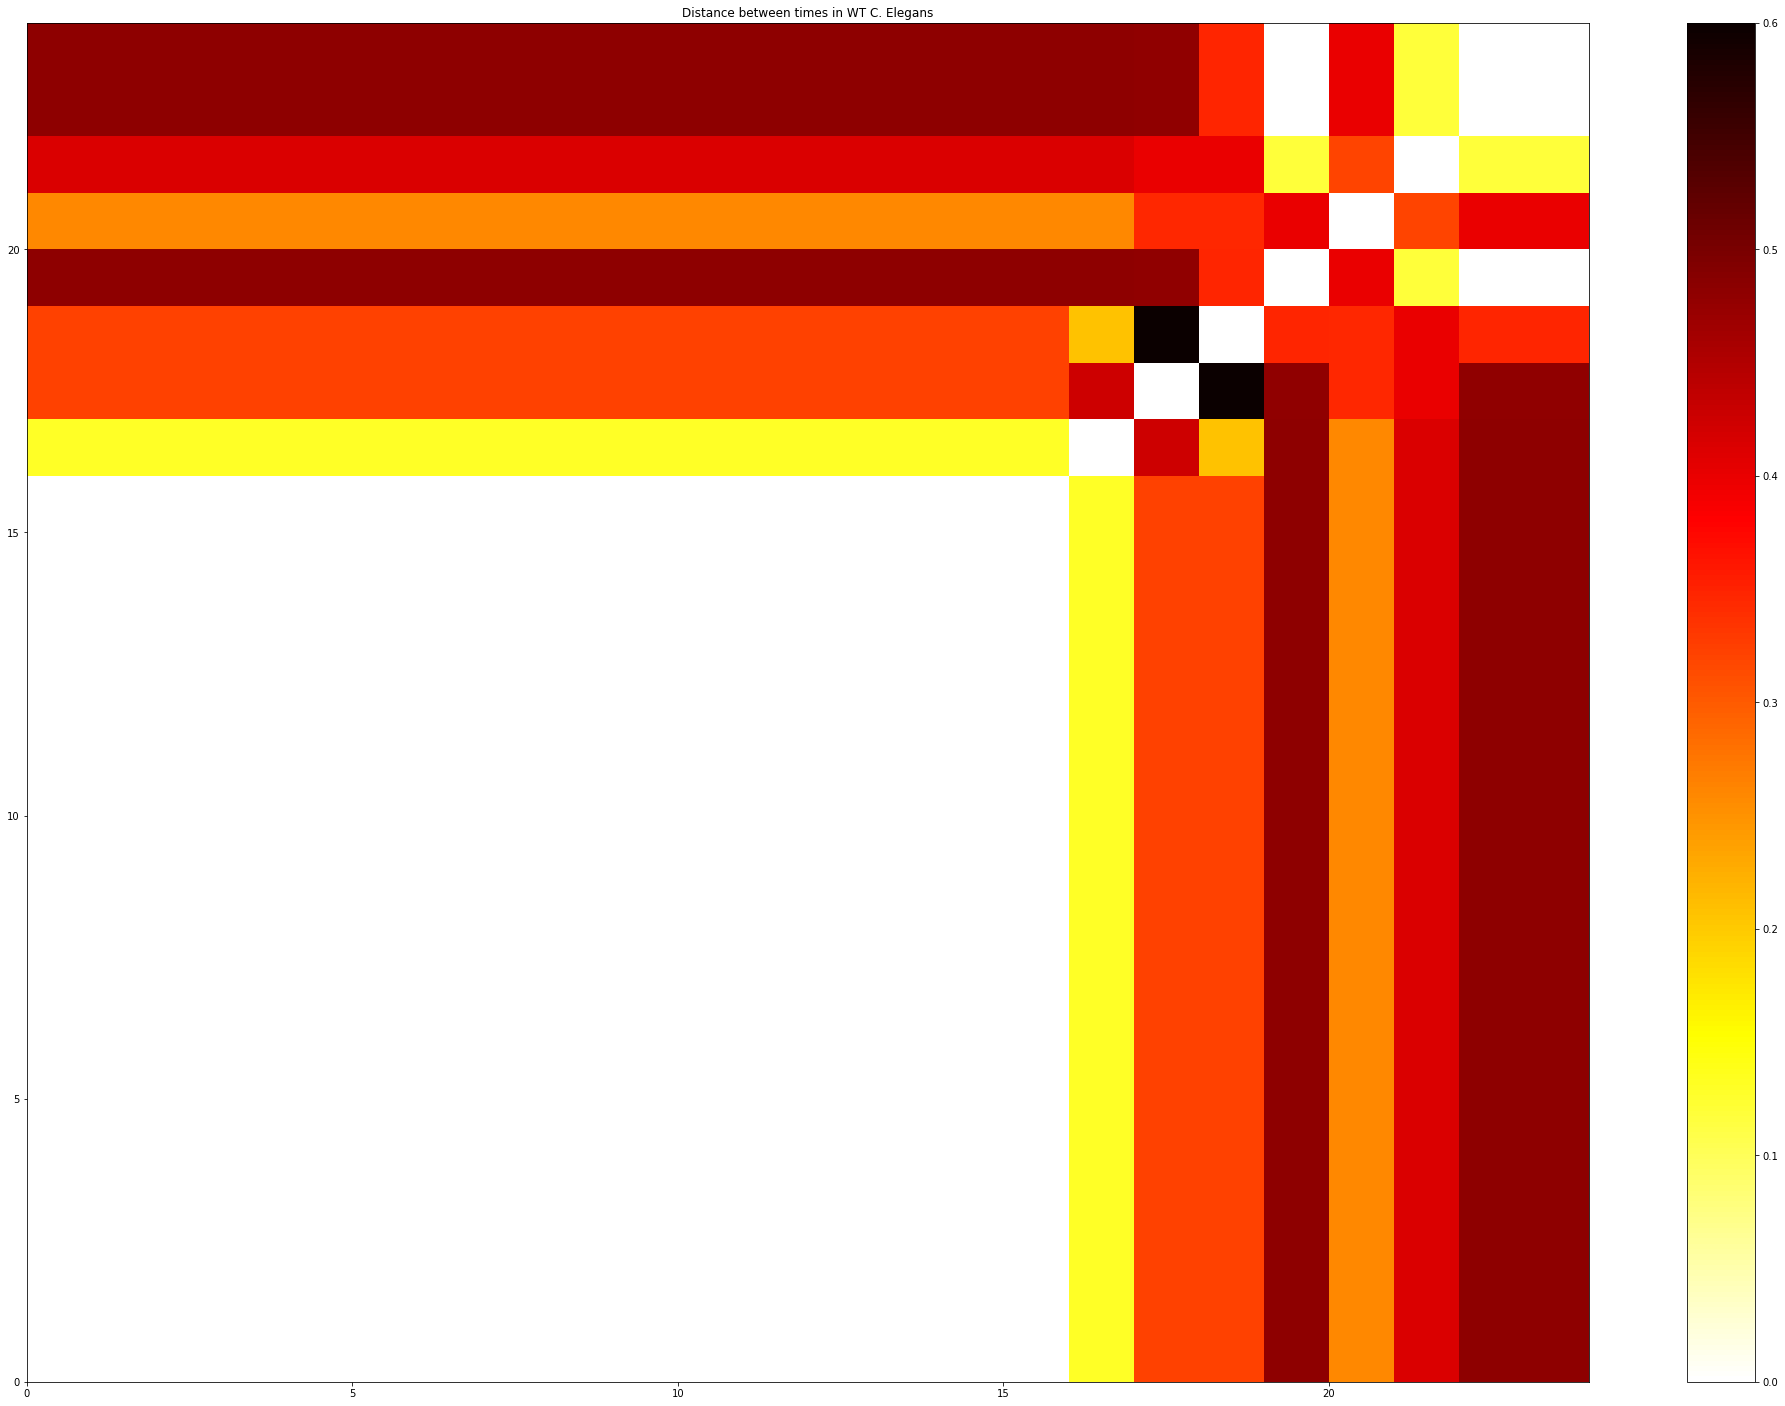

CDC-37 C tree 
 [2, 3, 4, 12, 23, 24, 25, 27, 1, 8, 9, 10, 16, 19, 20, 26, 161, 162, 163, 164, 165, 166, 167, 168]


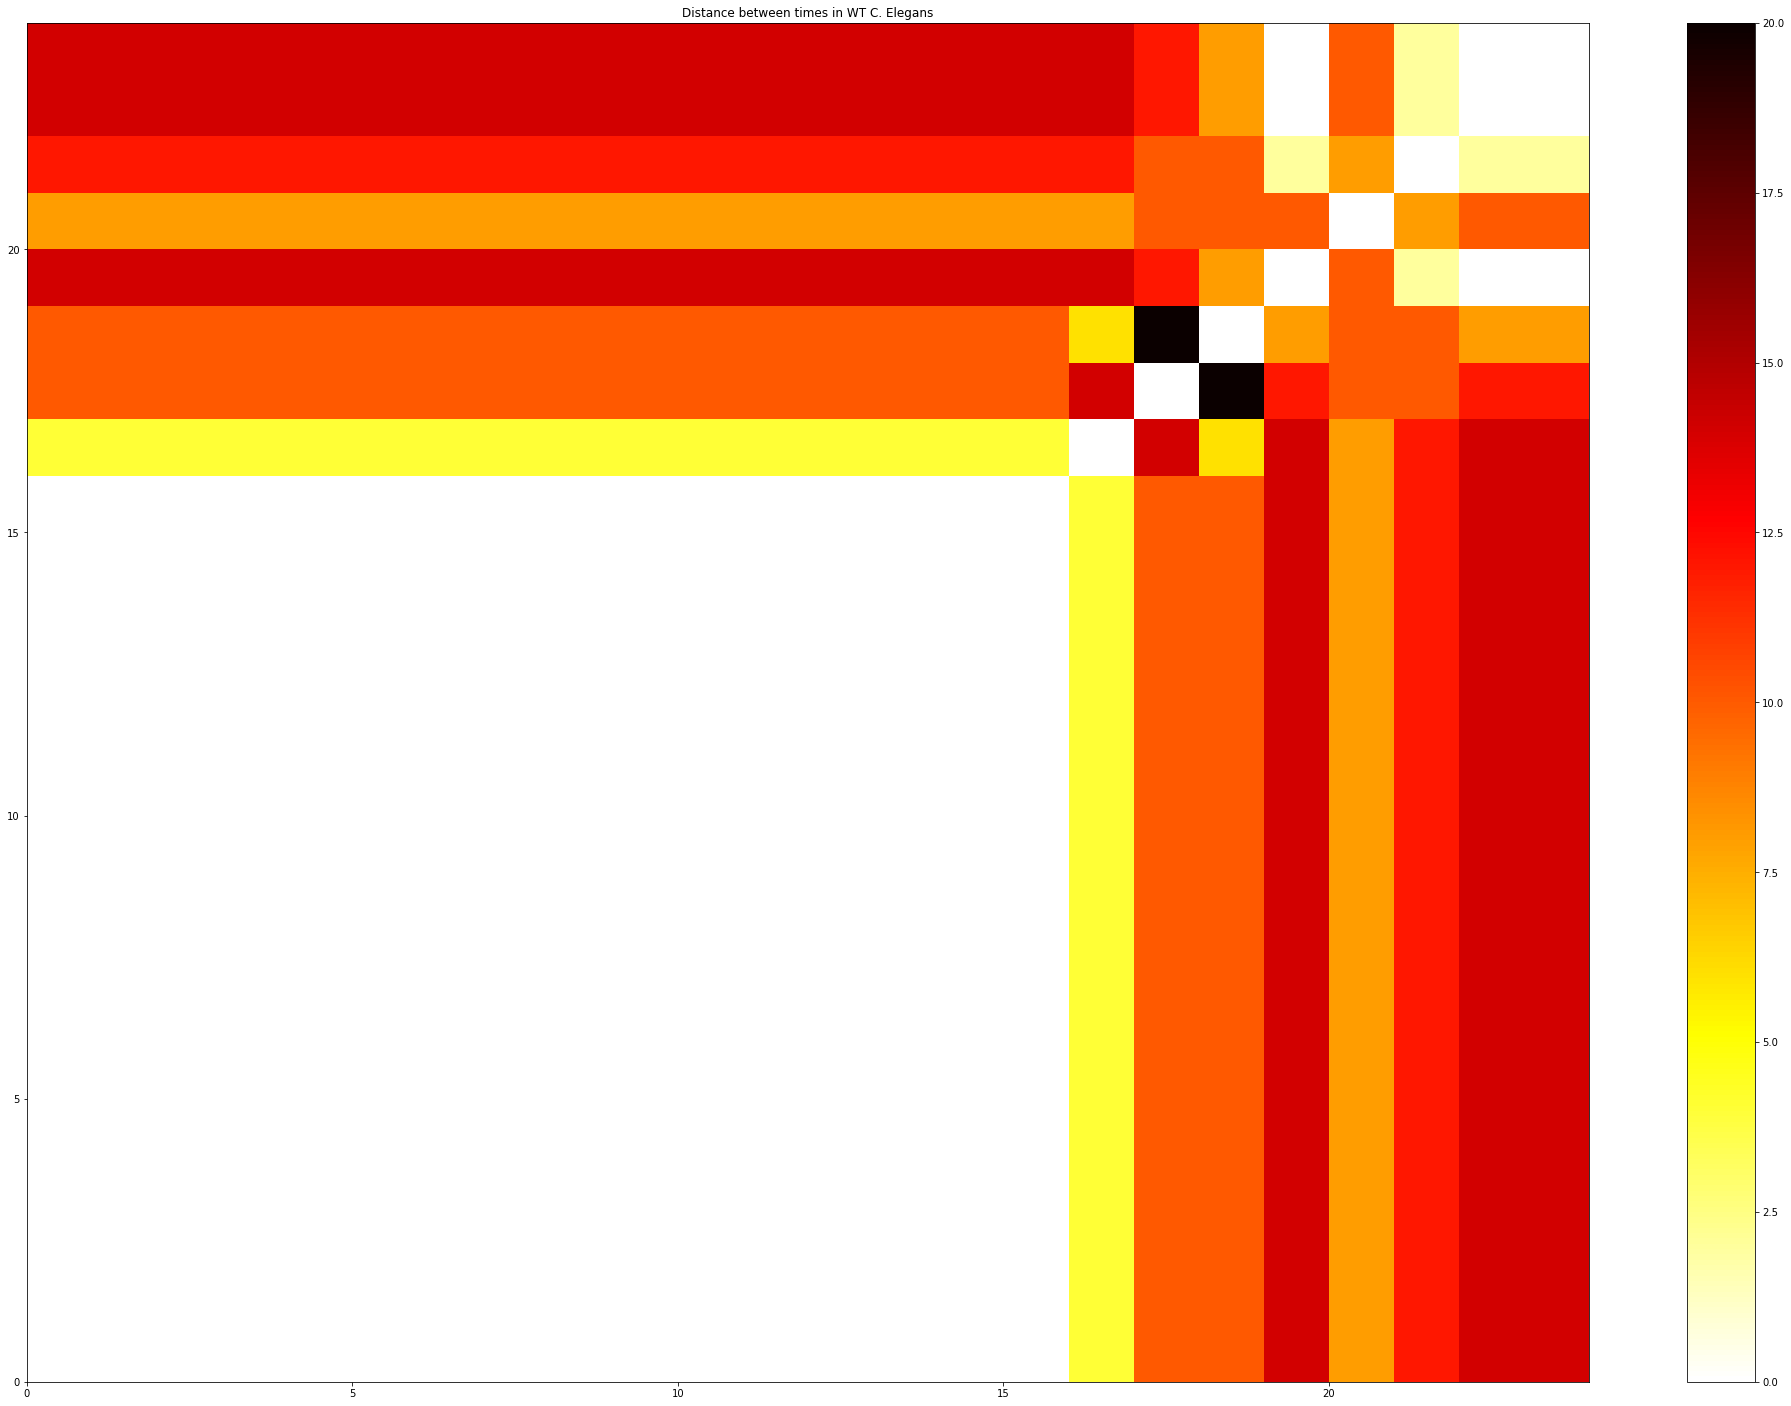

CDC-37 C branch 
 [8, 16]
Inlier Self Comparisions: ('mu', 15.093237008066637, 'var', 10.337053761184828)
Outlier Self Comparisions: ('mu', 12.880063825339068, 'var', 7.818241569477677)
RNAi Self Comparisions: ('mu', 50.88569581193208, 'var', 545.3602474498028)
Inlier/outlier Comparision: ('mu', 23.91059648021551, 'var', 37.747661674591534)
Inlier/RNAi Comparision: ('mu', 47.75785724380285, 'var', 304.97278576626076)
Outlier/RNAi Comparision: ('mu', 45.899513547744085, 'var', 500.84179893760063)


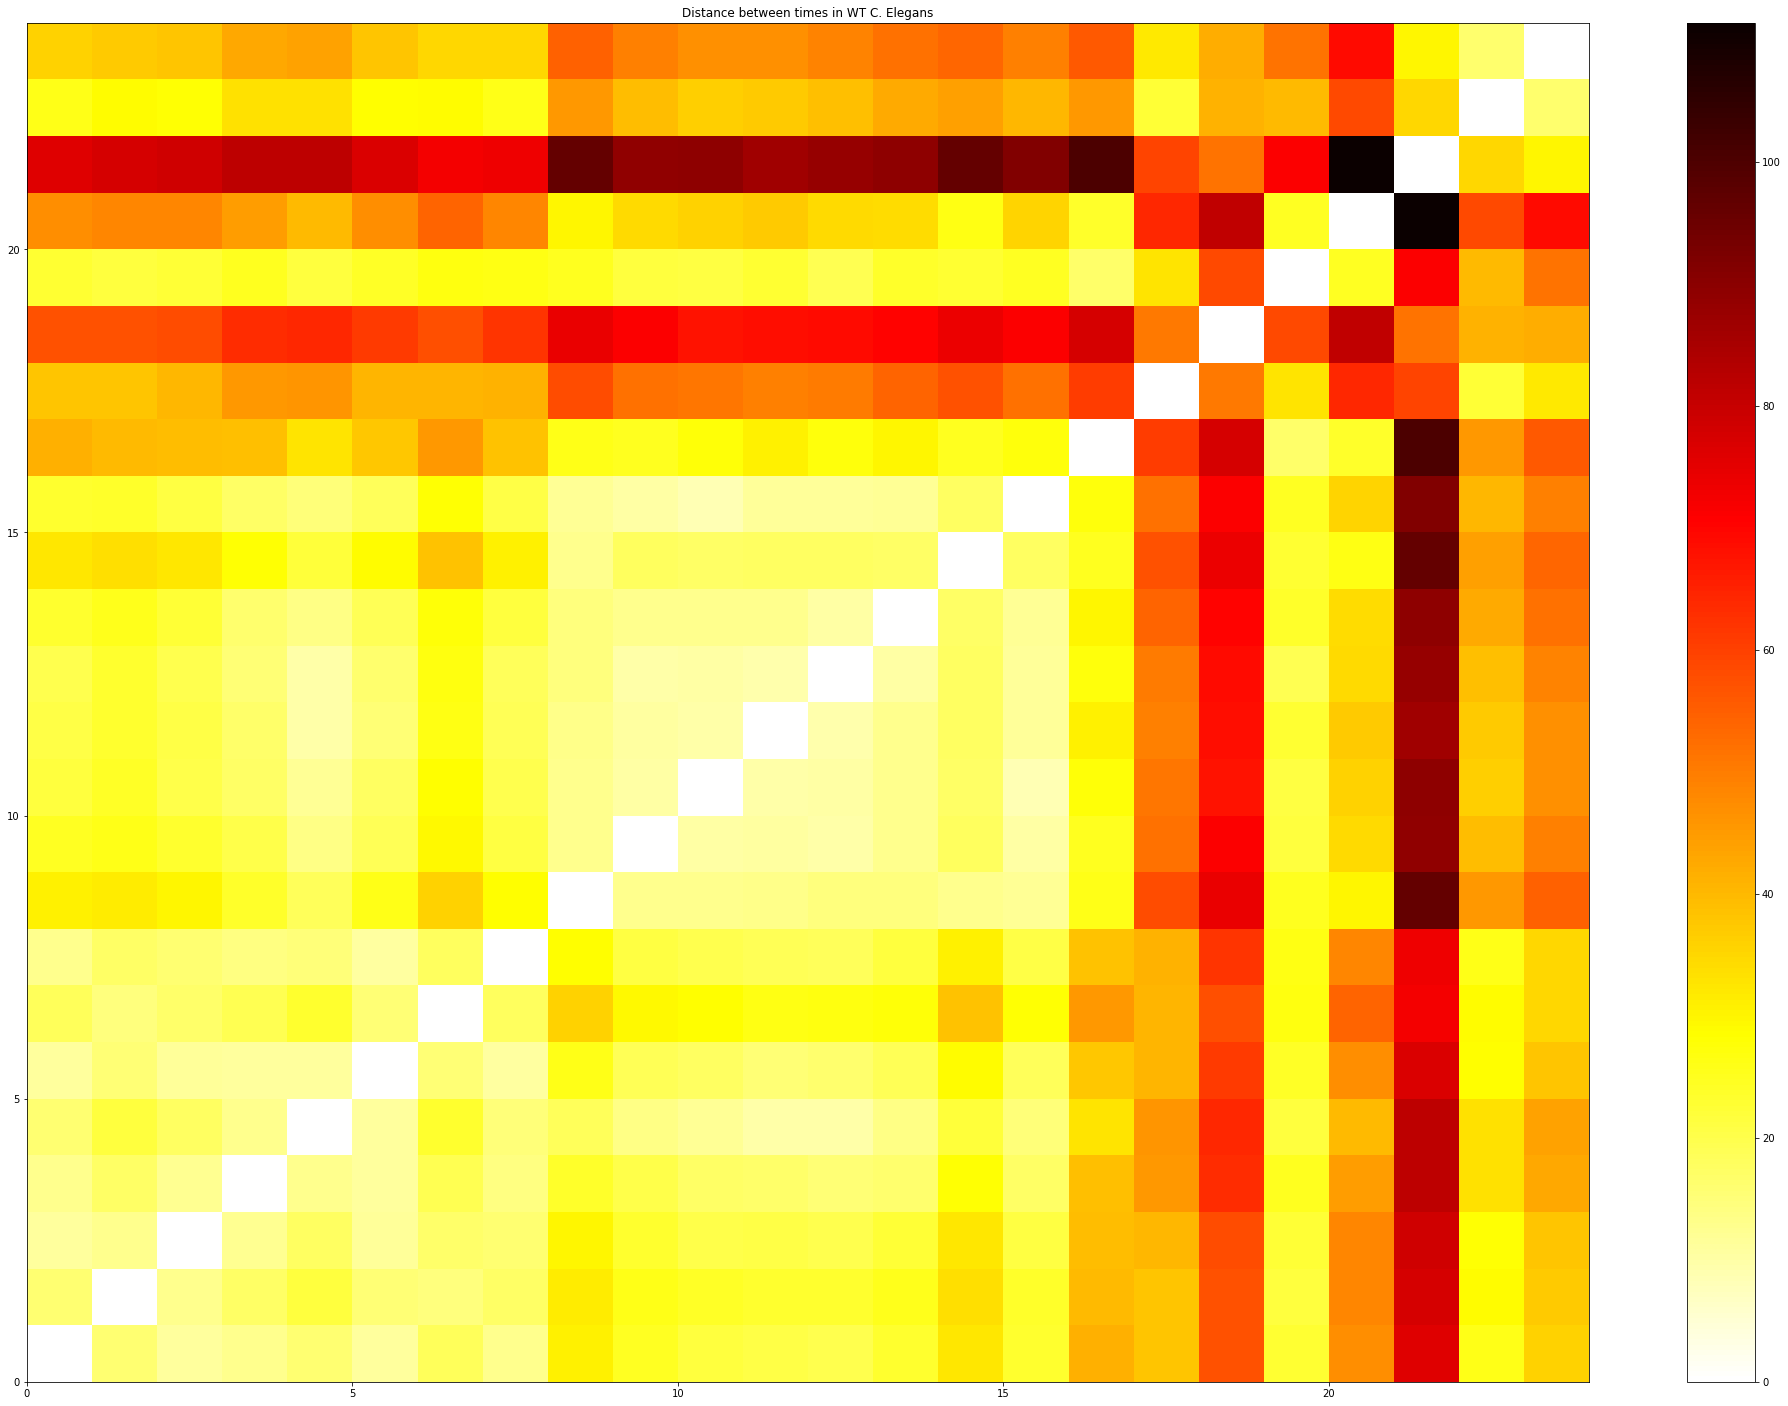

array([ 60.8358447 ,  77.58865897,  50.74445783,  16.85229955,
        33.04542328,  58.73670062,  23.85372088,  64.13267498,
        81.1972906 ,  24.49489743, 100.23472452,  59.55669568,
        51.7107339 ,  71.28814768, 111.49439448,  45.59605246,
        22.22611077,  41.21892769,  39.96248241,  58.43800133,
        35.14256678,  55.91958512,  31.96873473,  41.86884283,
        51.58488151,  68.94200461,  29.9165506 ,  16.24807681])

In [150]:
protein_tag = 'CDC-37'
cells_of_interest = Undefined_trans[protein_tag]
grid_indices = grid_indices_dict[protein_tag]
grid_dims = grid_dimensions[protein_tag]

for n in cells_of_interest:
    b_mat = [];j_mat = [];t_mat = [];
    for a in grid_indices:
        t_row = [];j_row = [];b_row = [];
        for b in grid_indices:
            #print(a,b)
            b_row.append(branch_distance(variable_nodes(fulldictset[a],n),variable_nodes(fulldictset[b],n)))
            j_row.append(jaccard_distance(variable_nodes(fulldictset[a],n),variable_nodes(fulldictset[b],n)))
            t_row.append(tree_edit_distance(variable_nodes(fulldictset[a],n),variable_nodes(fulldictset[b],n)))
        j_mat.append(j_row)
        t_mat.append(t_row)
        b_mat.append(b_row)
    print(protein_tag,n,'jaccard','\n',grid_indices)
    plot_2_examples(['hot_r'],np.mat(j_mat))
    #print(np.mat(j_mat))
    print(protein_tag,n,'tree','\n',grid_indices)
    plot_2_examples(['hot_r'],np.mat(t_mat))
    #print(np.mat(t_mat))
    print(protein_tag,n,'branch','\n',grid_dims)
    print('Inlier Self Comparisions:',self_comp(np.mat(b_mat)[0:grid_dims[0],0:grid_dims[0]]))
    print('Outlier Self Comparisions:',self_comp(np.mat(b_mat)[grid_dims[0]:grid_dims[1],grid_dims[0]:grid_dims[1]]))
    print('RNAi Self Comparisions:',self_comp(np.mat(b_mat)[grid_dims[1]:,grid_dims[1]:]))
    print('Inlier/outlier Comparision:',out_comp(np.mat(b_mat)[grid_dims[0]:grid_dims[1],0:grid_dims[0]]))
    print('Inlier/RNAi Comparision:',out_comp(np.mat(b_mat)[0:grid_dims[0],grid_dims[1]:]))
    print('Outlier/RNAi Comparision:',out_comp(np.mat(b_mat)[grid_dims[0]:grid_dims[1],grid_dims[1]:]))
    b_mat = np.mat(b_mat)
    plot_2_examples(['hot_r'],np.mat(b_mat))
    #print(np.mat(b_mat))

Inlier_self_comp = np.mat(b_mat)[grid_dims[1]:,grid_dims[1]:]
Inlier_self_comp = np.tril(np.array(Inlier_self_comp)).flatten()
Inlier_self_comp = Inlier_self_comp[np.where(Inlier_self_comp != 0.0)]
Inlier_self_comp

In [86]:
Inlier_self_comp = np.mat(b_mat)[grid_dims[1]:,grid_dims[1]:]
Inlier_self_comp = np.tril(np.array(Inlier_self_comp)).flatten()
Inlier_self_comp = Inlier_self_comp[np.where(Inlier_self_comp != 0.0)]
Inlier_self_comp

array([11.70469991, 50.019996  , 14.96662955, 66.73080248, 19.15724406,
       37.72267223, 51.09794516, 15.58845727, 21.88606863, 39.54743987,
       56.59505279,  6.8556546 , 22.38302929, 22.3159136 , 19.39071943])

In [82]:
def self_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    imp_mat = np.tril(np.array(imp_mat)).flatten()
    imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return ('mu',np.mean(imp_mat),'var',np.var(imp_mat))

In [145]:
def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    sample_size = int((min(imp_mat.shape) ** 2 - min(imp_mat.shape)) / 2)
    samples = np.random.choice(imp_mat.flatten().tolist()[0], sample_size)
    return ('mu',np.mean(samples),'var',np.var(samples))

In [151]:
#print('Inlier/RNAi Comparision:',out_comp(np.mat(b_mat)[grid_dims[0]:grid_dims[1],grid_dims[1]:]))

In [152]:
#plot_2_examples(['hot_r'],np.mat(b_mat)[grid_dims[0]:grid_dims[1],0:grid_dims[0]])